# 0.0. INITIAL

## 0.1. Imports

In [2]:
# general utilities
import pickle
import inflection
import warnings
from IPython.core.display       import HTML
from IPython.display            import Image
from tabulate                   import tabulate
from GeneralUtils               import GeneralUtils

%matplotlib inline
%pylab inline

warnings.filterwarnings('ignore')

# data manipulation and EDA
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib
from pandas_profiling           import ProfileReport
from scipy                      import stats            as ss

# preprocessing
from sklearn.preprocessing      import RobustScaler, MinMaxScaler
from imblearn.combine           import SMOTETomek
from sklearn.model_selection    import train_test_split

# feature selection
from boruta                     import BorutaPy

# machine learning
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# model evaluation
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import brier_score_loss, classification_report, roc_curve
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score, accuracy_score, cohen_kappa_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score

# model calibration
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

Populating the interactive namespace from numpy and matplotlib


## 0.2. Functions

In [3]:
gu = GeneralUtils()

gu.visual_settings()

## 0.3. Data Load

In [4]:
df_raw = pd.read_csv('C:/Users/lucas/Documents/MeusProjetos/stroke_prediction/data/healthcare-dataset-stroke-data.csv', low_memory = False)

In [5]:
df_raw.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [6]:
df_raw.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.00,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.00,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35.00,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51.00,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0
5109,44679,Female,44.00,0,0,Yes,Govt_job,Urban,85.28,26.20,Unknown,0


# 1.0. DATA DESCRIPTION

In [7]:
df1 = df_raw.copy()

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 1.1. Data Dictionary

| Feature                                       | Description      |
|:---------------------------|:---------------------------------------------------------------------------|
| id        | unique identifier |
| gender        | "Male", "Female" or "Other" | 
| age        | age of the patient |
| hypertension        | 0 if the patient doesn't have hypertension, 1 if the patient has hypertension | 
| heart_disease        | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease |
| ever_married   | "No" or "Yes" |
| work_type            |  "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" |
| Residence_type          | "Rural" or "Urban" |
| avg_glucose_level           | average glucose level in blood                                    |
| bmi             | body mass index                                        |
| smoking_status             | "formerly smoked", "never smoked", "smokes" or "Unknown"                 |
| stroke (target)            | 1 if the patient had a stroke or 0 if not                      |

## 1.2. Column's Names

In [9]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## 1.3. Data Dimensions

In [10]:
print('Number of Rows: {}'.format(df1.shape[0]))

print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 5110
Number of Columns: 12


## 1.4. Coverting Data Types

In [11]:
df1.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [12]:
df1['age'] = df1['age'].astype(np.int64)

In [13]:
df1.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## 1.5. Checking NA

In [14]:
df1.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
df1[df1['bmi'].isna() ]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


## 1.6. Replacing NA

In [16]:
round(df1['bmi'].median(), 2)

28.1

In [17]:
df1.fillna(round(df1['bmi'].median(), 2), inplace = True)

In [18]:
df1.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.10,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [20]:
# Verification of data equal to zero, some columns presented it but is in line with expectations
# because they are binary variables (0 or 1)
print("# Linhas no dataframe {0}".format(len(df1)))

for i in range(len(df1.columns)):

    j = df1.columns[i]
    print("# Linhas missing {0} : {1}".format(j, len(df1.loc[df1[j] == 0])))

# Linhas no dataframe 5110
# Linhas missing id : 0
# Linhas missing gender : 0
# Linhas missing age : 43
# Linhas missing hypertension : 4612
# Linhas missing heart_disease : 4834
# Linhas missing ever_married : 0
# Linhas missing work_type : 0
# Linhas missing Residence_type : 0
# Linhas missing avg_glucose_level : 0
# Linhas missing bmi : 0
# Linhas missing smoking_status : 0
# Linhas missing stroke : 4861


### 1.6. Descriptive Statistics

In [63]:
# Spliting variables into categorical and numerical ones for analysis
num_attr = df1.select_dtypes(include = ['int64', 'float64'])
cat_attr = df1.select_dtypes(exclude = ['int64', 'float64'])

#### 1.6.1 Numerical Attributes

In [64]:
summary_stats  = gu.descriptive_statistics(data_set = num_attr)
summary_stats 

,attributes,min,max,range,mean,median,std,skewness,kurtosis
0,id,67.00,72940.00,72873.00,36517.83,36932.00,21159.65,-0.02,-1.21
1,age,0.00,82.00,82.00,43.22,45.00,22.63,-0.14,-0.99
2,hypertension,0.00,1.00,1.00,0.10,0.00,0.30,2.72,5.38
3,heart_disease,0.00,1.00,1.00,0.05,0.00,0.23,3.95,13.59
4,avg_glucose_level,55.12,271.74,216.62,106.15,91.88,45.28,1.57,1.68
5,bmi,10.30,97.60,87.30,28.86,28.10,7.70,1.09,3.64
6,stroke,0.00,1.00,1.00,0.05,0.00,0.22,4.19,15.59


**Descriptive Statistics Analysis:**
- None of the variables have negative numbers.
- Age ranges from 0 to more than 82. It means that newborns and childs are being considered in the dataset.

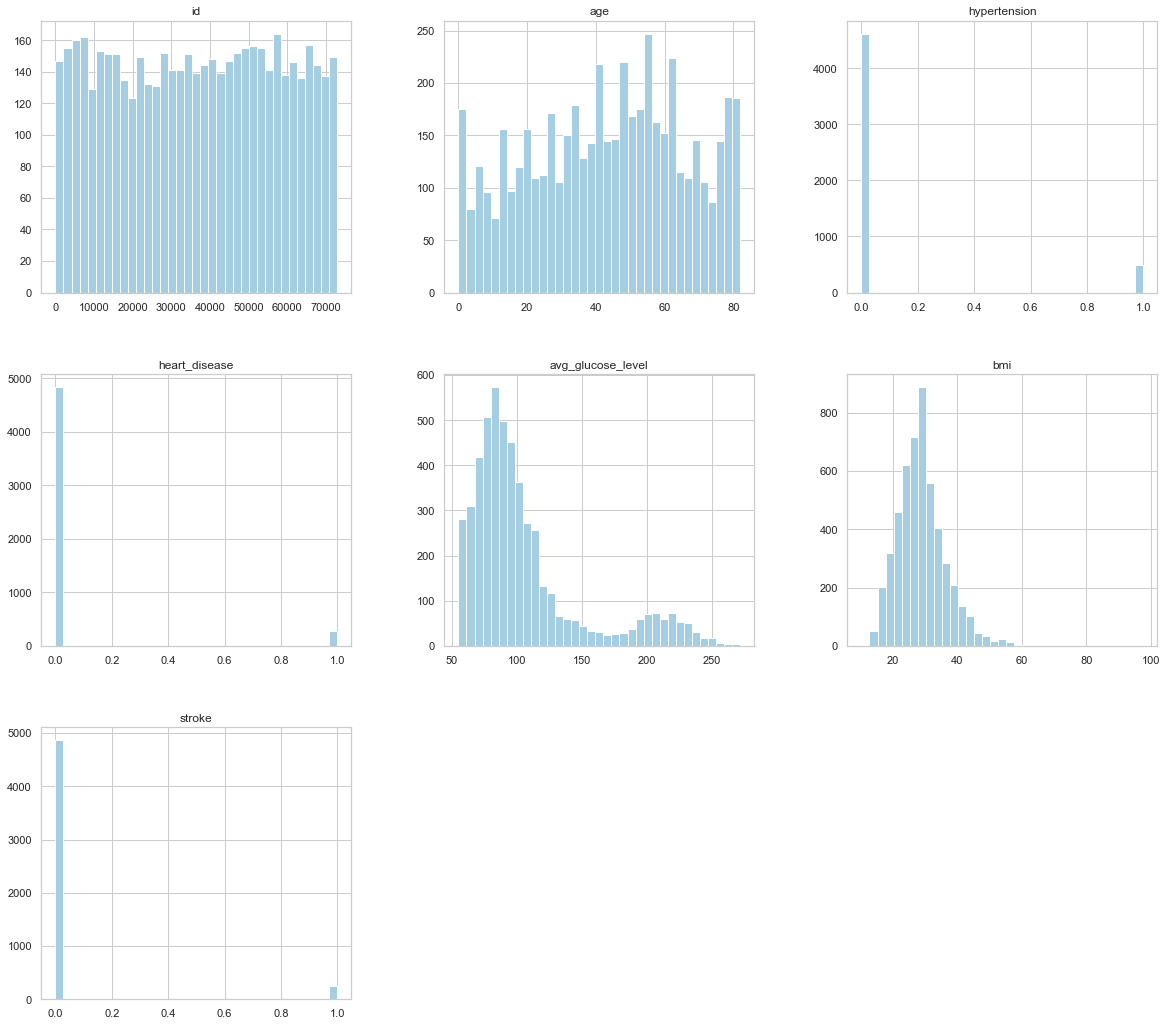

In [112]:
num_attr.hist(bins = 35);

#### 1.6.2 Categorical Attributes

In [66]:
# Discovering how many types each categorical variable has
cat_attr.apply(lambda x: x.unique().shape[0])

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

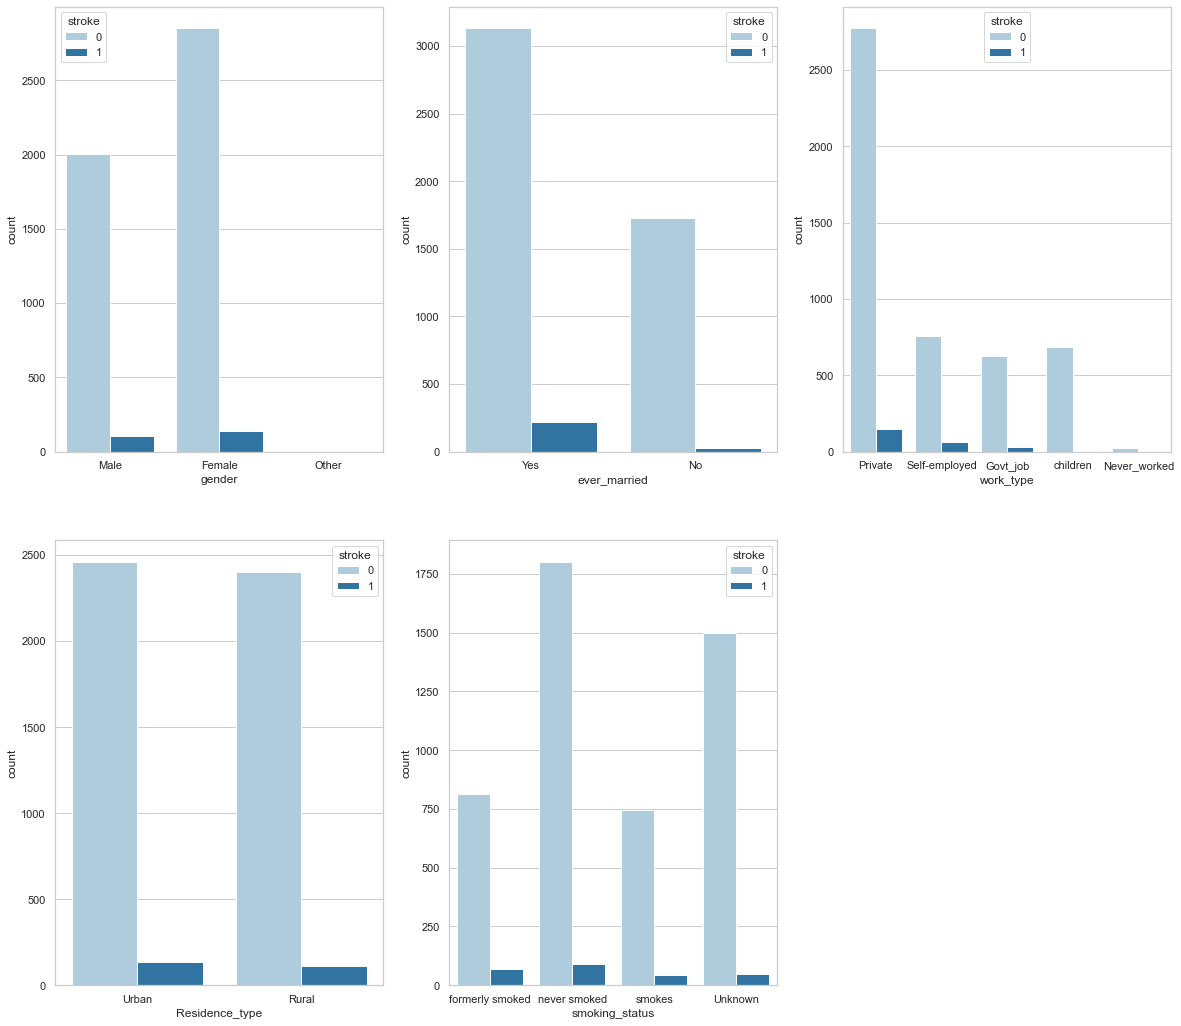

In [67]:
plt.subplot(2, 3, 1)
sns.countplot(data = df1, x = 'gender', hue = 'stroke');

plt.subplot(2, 3, 2)
sns.countplot(data = df1, x = 'ever_married', hue = 'stroke');

plt.subplot(2, 3, 3)
sns.countplot(data = df1, x = 'work_type', hue = 'stroke');

plt.subplot(2, 3, 4)
sns.countplot(data = df1, x = 'Residence_type', hue = 'stroke');

plt.subplot(2, 3, 5)
sns.countplot(data = df1, x = 'smoking_status', hue = 'stroke');

## 2.0. FEATURE ENGINEERING

In [68]:
df2 = df1.copy()

### 2.1. Hypothesis Mind Map

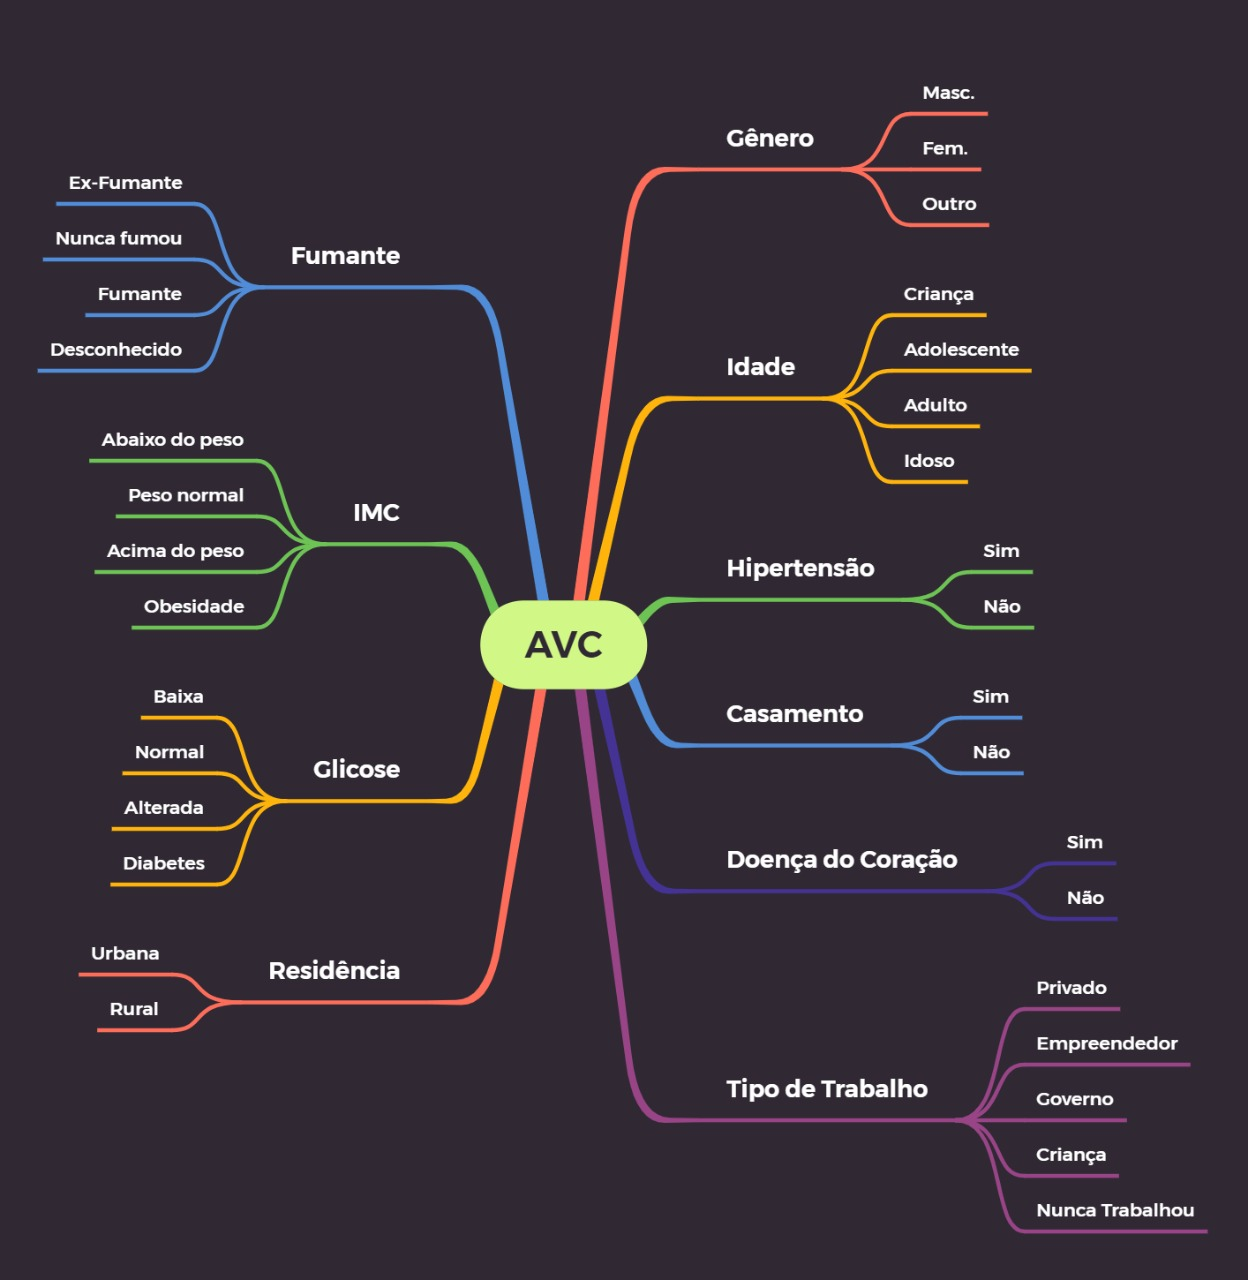

In [69]:
# Hypothesis Mind Map
Image('C:/Users/lucas/Documents/MeusProjetos/stroke_prediction/image/hmm.jpeg')

### 2.2. Hypothesis Creation

Hipóteses Gênero

1 - Homens têm mais chances de ter AVC que mulheres 

Hipóteses Fumante

1 - Fumantes têm mais chances de ter AVC que os demais

2 - Pessoas que nunca fumaram têm menos chances de ter AVC que os demais

Hipóteses Idade

1 - Crianças têm menos chances de ter AVC que os demais

2 - Idosos têm mais chances de ter AVC que os demais

Hipóteses IMC

1 - Pessoas obesas têm mais chances de ter AVC que os demais

2 - Pessoas com peso normal têm menos chances de ter AVC que os demais

Hipóteses Glicose

1 - Pessoas diabéticas têm mais chances de ter AVC que os demais

2 - Pessoas com glicose normal têm menos chances de ter AVC que os demais

Hipóteses Casamento

1 - Pessoas casadas têm mais chances de ter AVC 

Hipóteses Hipertensão

1 - Pessoas hipertensas têm mais chances de ter AVC

Hipóteses Doença do Coração

1 - Pessoas cardíacas têm mais chances de ter AVC

Hipóteses Residência

1 - Pessoas que moram na zona urbana têm mais chances de ter AVC

Hipóteses Tipo de Trabalho

1 - Pessoas empreendedoras têm mais chances de ter AVC que os demais

2 - Crianças têm menos chances de ter AVC que os demais

### 2.3. Feature Engineering

In [70]:
# Dividindo o IMC (BMI) em categorias que possibilitem a análise e validação das hipóteses
df2['weight_status'] = df2['bmi'].apply(lambda x: 'underweight'     if      x < 18.5                else
                                                  'normal_weight'   if      (x >= 18.5) & (x <= 24.9)   else
                                                  'overweight'      if      (x > 24.9) & (x < 30)       else
                                                  'obesity')

In [71]:
# Dividindo o nível de glicose em categorias que possibilitem a análise e validação das hipóteses
df2['glucose_status'] = df2['avg_glucose_level'].apply(lambda x: 'low'          if      x <= 70                 else
                                                                 'normal'       if      (x > 70) & (x < 100)    else
                                                                 'prediabetes'  if      (x >= 100) & (x <= 125) else
                                                                 'diabetes')

In [72]:
# Dividindo as idades em categorias que possibilitem a análise e validação das hipóteses
df2['age_group'] = df2['age'].apply(lambda x:   'children'          if      x <= 16                else
                                                'adult'             if      (x > 16) & (x < 60)       else
                                                'elderly')

## 3.0. VARIABLE FILTERING

In [73]:
df3 = df2.copy()

## 4.0. EXPLORATORY DATA ANALYSIS

In [74]:
df4 = df3.copy()

### 4.1. Univariate analysis

#### 4.1.1 Response Variable

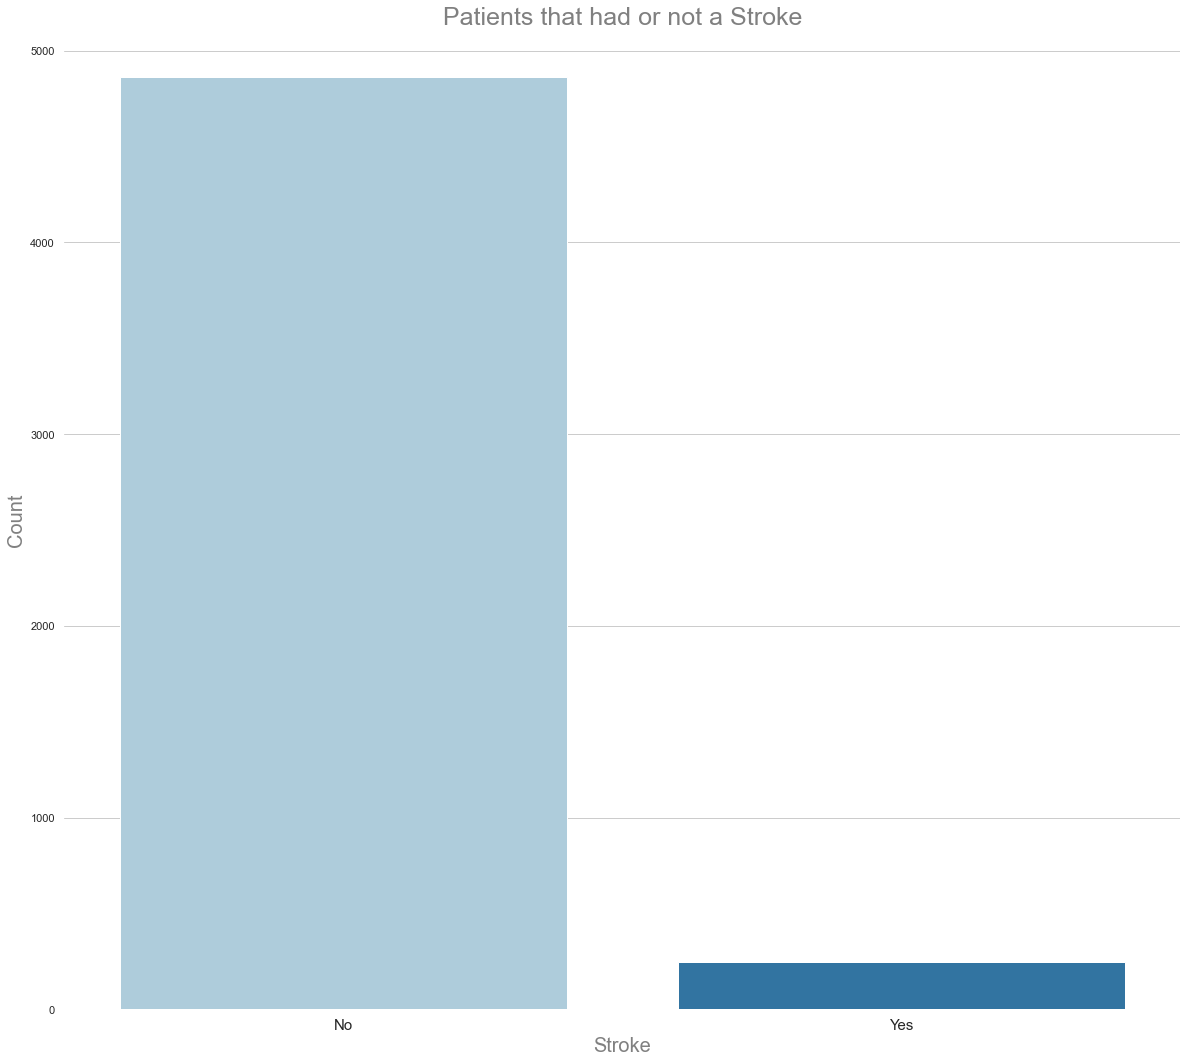

In [75]:
# Percebe-se um significativo desbalanceamento na variável resposta
sns.countplot(data = df4, x = 'stroke');
sns.set_style('whitegrid')
plt.title('Patients that had or not a Stroke', size = 25, color = 'grey')
plt.xlabel('Stroke', size = 20, color = 'grey')
plt.xticks(np.arange(2), labels=['No','Yes'], size = 15)
sns.set_style("whitegrid")
sns.despine( bottom = True, left = True)
plt.ylabel("Count", size = 20, color = 'grey');

#### 4.1.2 Numerical Variables

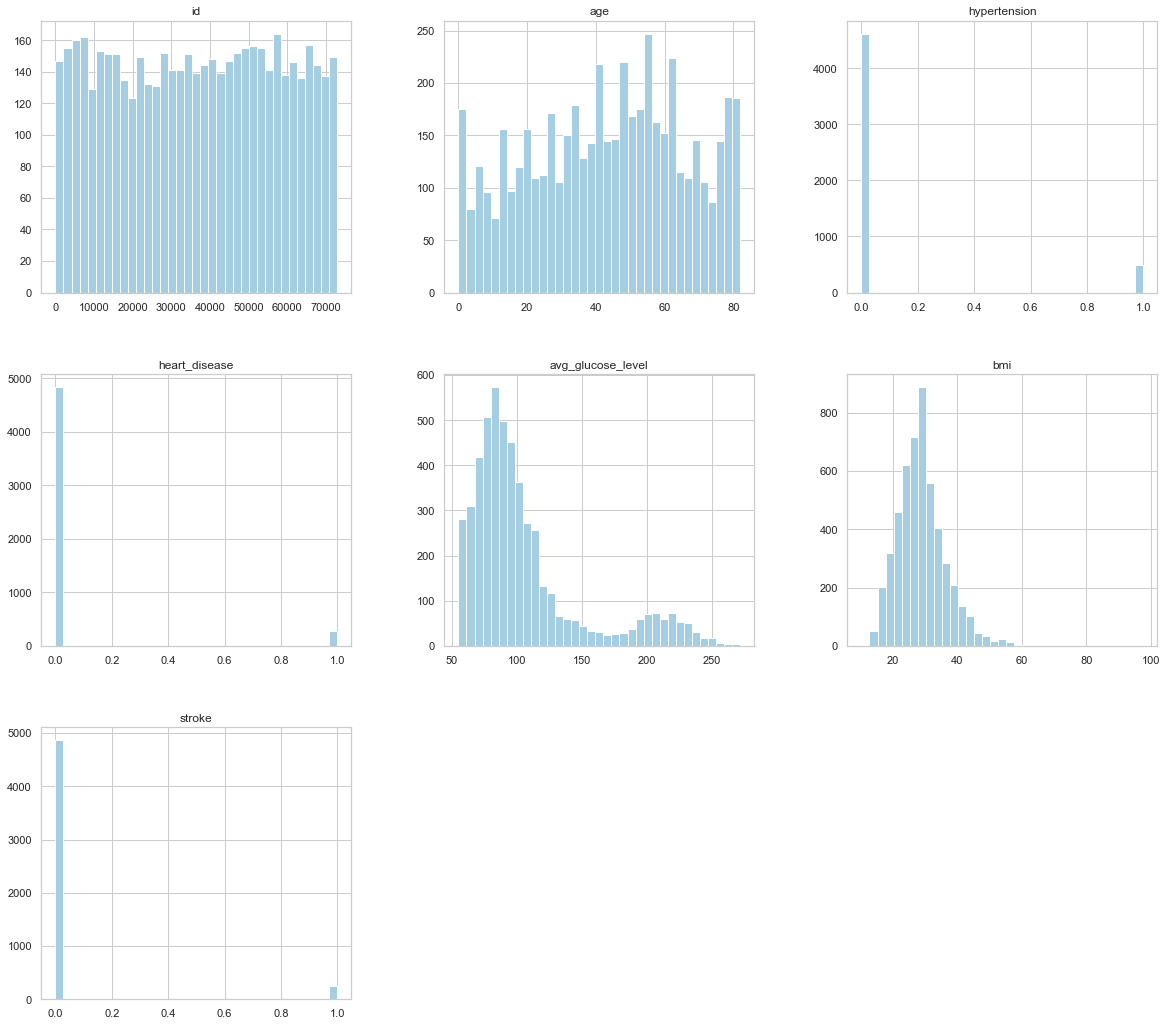

In [76]:
num_attr.hist(bins = 35);

#### 4.1.3 Categorical Variables

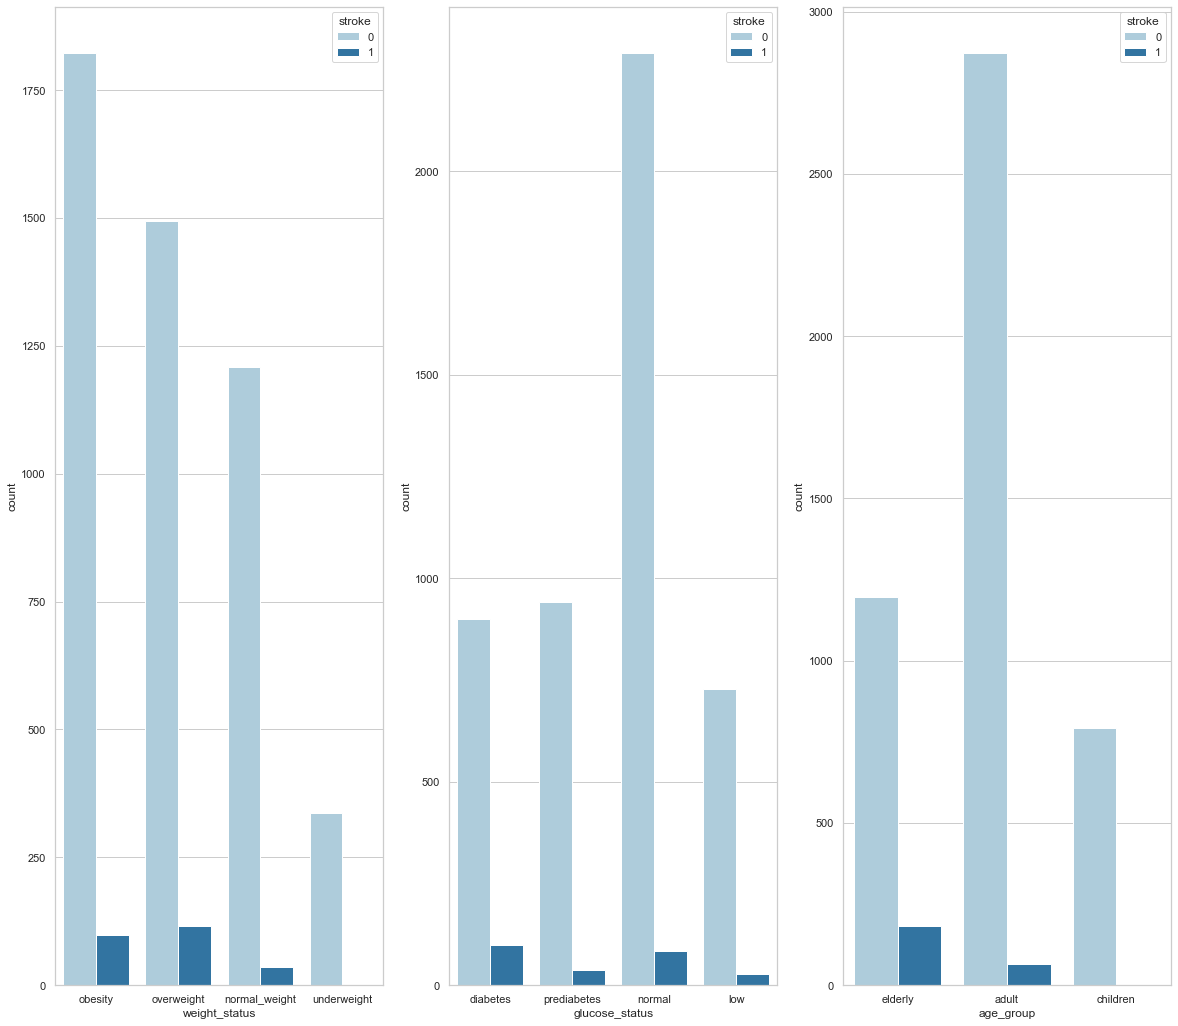

In [77]:
# weight_status
plt.subplot(1, 3, 1)
sns.countplot(data = df4, x = 'weight_status', hue = 'stroke');

# glucose_status
plt.subplot(1, 3, 2)
sns.countplot(data = df4, x = 'glucose_status', hue = 'stroke');

# age_group
plt.subplot(1, 3, 3)
sns.countplot(data = df4, x = 'age_group', hue = 'stroke');


### 4.2. Bivariate analysis - Hypothesis Validation

#### Hipótese 1 - Homens têm mais chances de ter AVC que mulheres 

FALSA - Mulheres tiveram mais AVC que homens

In [78]:
aux = df4[df4['stroke'] == 1][['gender', 'stroke']].groupby('gender').sum().reset_index().sort_values(by = 'stroke', ascending = False)
aux

,gender,stroke
0,Female,141
1,Male,108


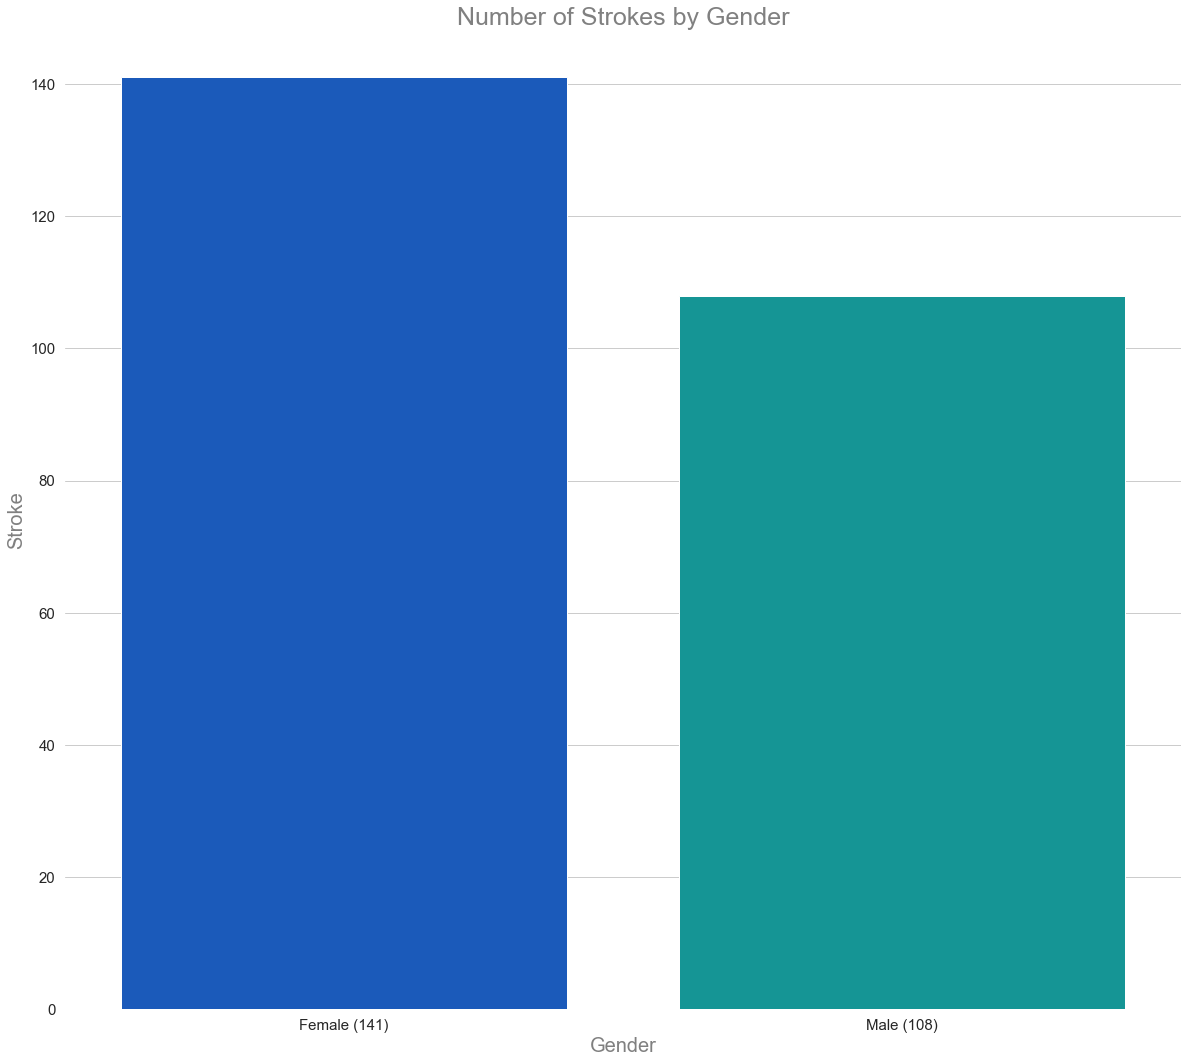

In [79]:
sns.barplot(x = 'gender', y = 'stroke', data = aux, palette = 'winter');
plt.title('Number of Strokes by Gender', size = 25, color = 'grey')
sns.despine(bottom = True, left = True)
plt.xlabel("Gender", size = 20, color = 'grey')
plt.ylabel("Stroke", size = 20, color = 'grey')
plt.xticks(np.arange(2), ['Female (141)', 'Male (108)'], size = 15)
plt.yticks(size = 15);

#### Hipótese 2 - Fumantes têm mais chances de ter AVC que os demais 

FALSA - Fumantes tiveram MENOS AVC

#### Hipótese 3 - Pessoas que nunca fumaram têm menos chances de ter AVC que os demais

FALSA - Pessoas que nunca fumaram tiveram MAIS AVC

In [80]:
aux1 = df4[df4['stroke'] == 1][['smoking_status', 'stroke']].groupby('smoking_status').sum().reset_index().sort_values(by = 'stroke', ascending = False)
aux1

,smoking_status,stroke
2,never smoked,90
1,formerly smoked,70
0,Unknown,47
3,smokes,42


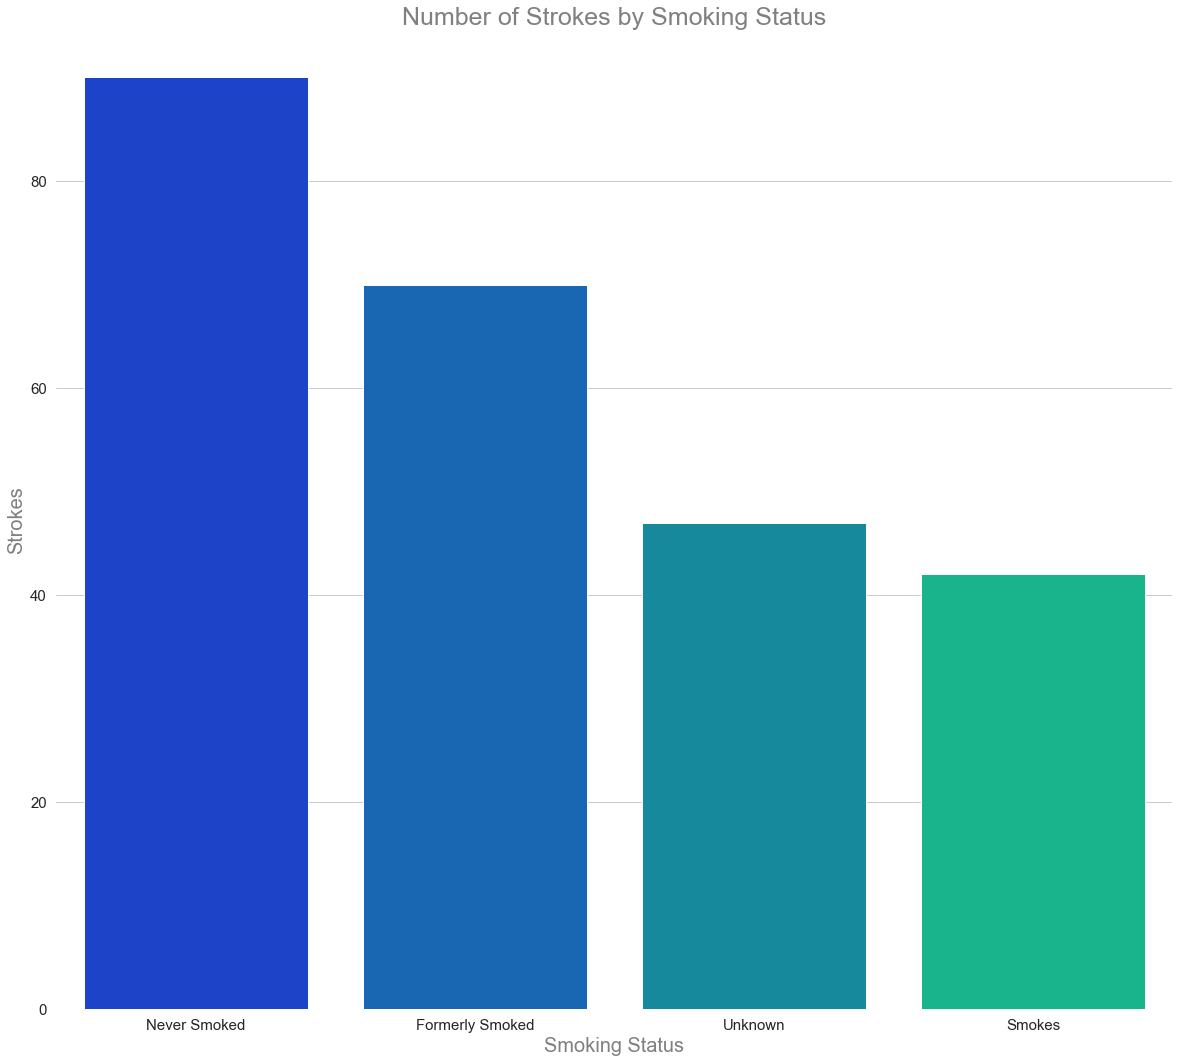

In [81]:
sns.barplot(x = 'smoking_status', y = 'stroke', data = aux1, palette = 'winter')
sns.despine(bottom = True, left = True)
plt.title('Number of Strokes by Smoking Status', size = 25, color = 'gray')
plt.xlabel("Smoking Status", size = 20, color = 'grey')
plt.ylabel("Strokes", size = 20, color = 'grey')
plt.xticks(np.arange(4), ['Never Smoked', 'Formerly Smoked', 'Unknown', 'Smokes'], size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15);

#### Hipótese 4 - Crianças têm menos chances de ter AVC que os demais 

VERDADEIRA - Crianças tiveram MENOS AVC

#### Hipótese 5 - Idosos têm mais chances de ter AVC que os demais

VERDADEIRA - Idosos tiveram MAIS AVC

In [82]:
aux2 = df4[df4['stroke'] == 1][['age_group', 'stroke']].groupby('age_group').sum().reset_index().sort_values(by = 'stroke', ascending = False)
aux2

,age_group,stroke
2,elderly,181
0,adult,66
1,children,2


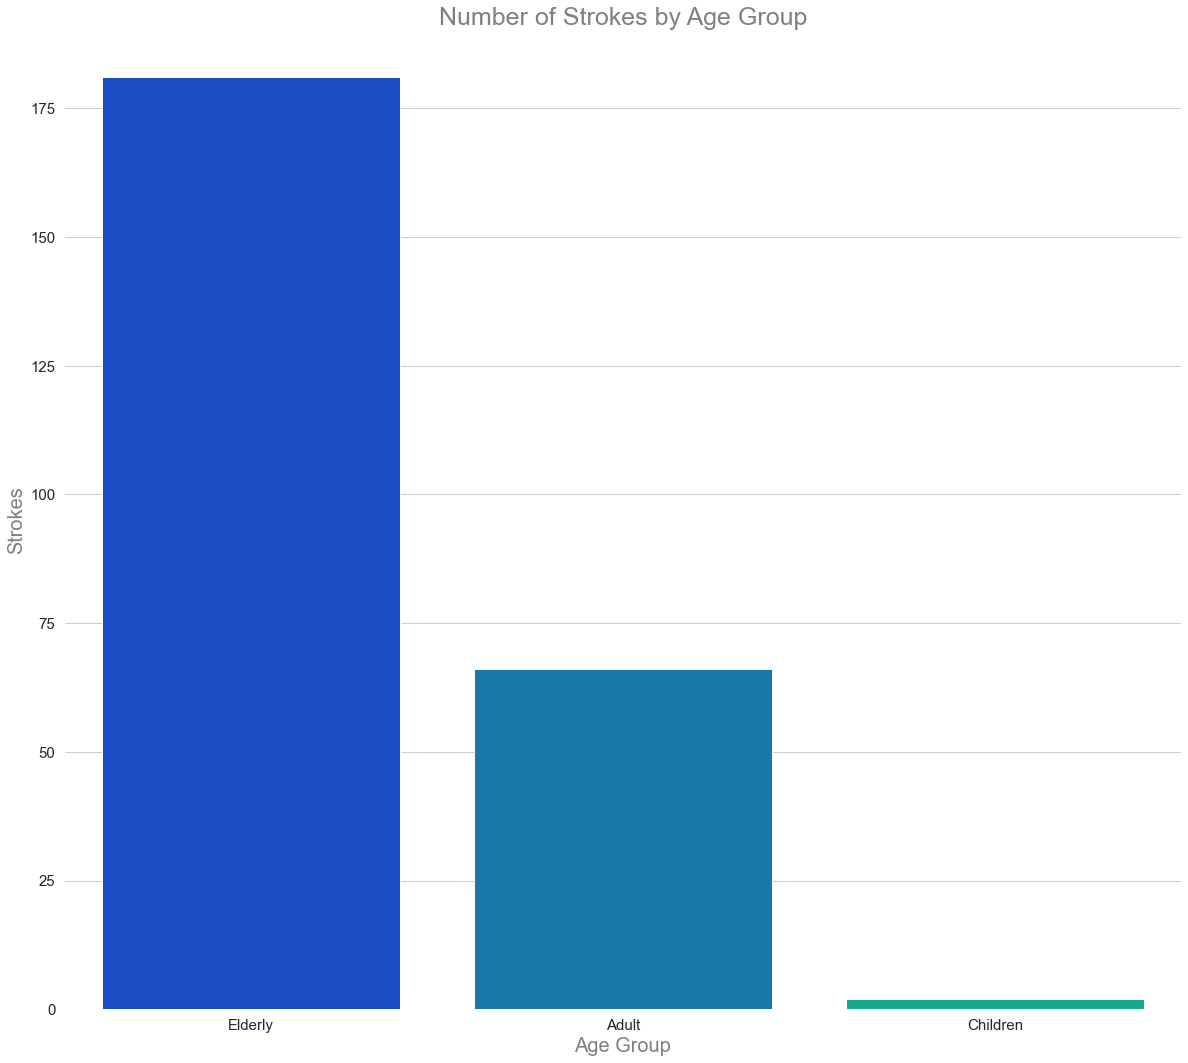

In [83]:
sns.barplot(x = 'age_group', y = 'stroke', data = aux2, palette = 'winter')
sns.despine(bottom = True, left = True)
plt.title('Number of Strokes by Age Group', size = 25, color = 'gray')
plt.xlabel("Age Group", size = 20, color = 'grey')
plt.ylabel("Strokes", size = 20, color = 'grey')
plt.xticks(np.arange(3), ['Elderly', 'Adult', 'Children'], size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15);

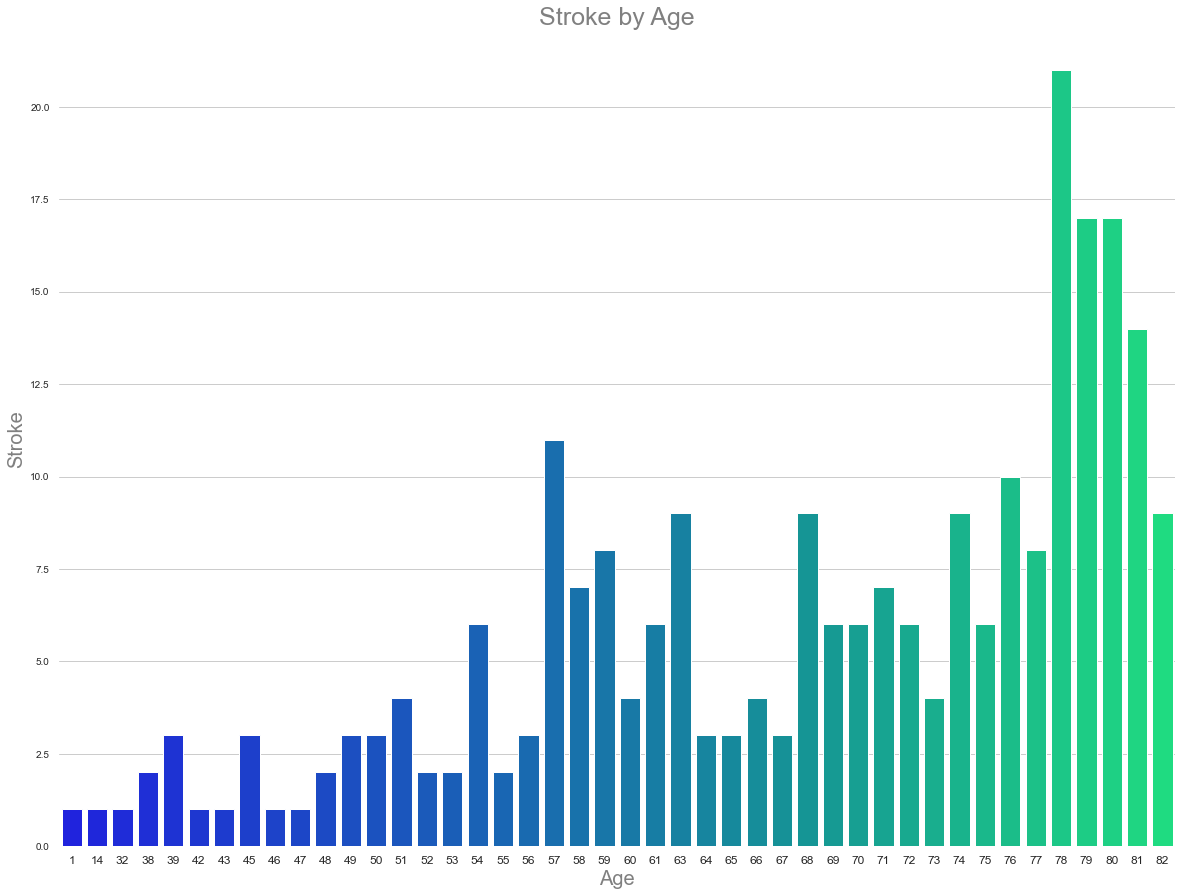

In [84]:
plt.figure(figsize(20,15))
aux3 = df4[df4['stroke'] == 1][['age', 'stroke']].groupby('age').sum().reset_index()
sns.barplot( x = 'age', y = 'stroke', data = aux3, palette = 'winter' );
plt.title('Stroke by Age', size = 25, color = 'grey')
sns.set_style("whitegrid")
sns.despine( bottom = True, left = True)
plt.xticks(size = 12)
plt.yticks(size = 10)
plt.xlabel("Age", size = 20, color = 'grey')
plt.ylabel("Stroke", size = 20, color = 'grey');

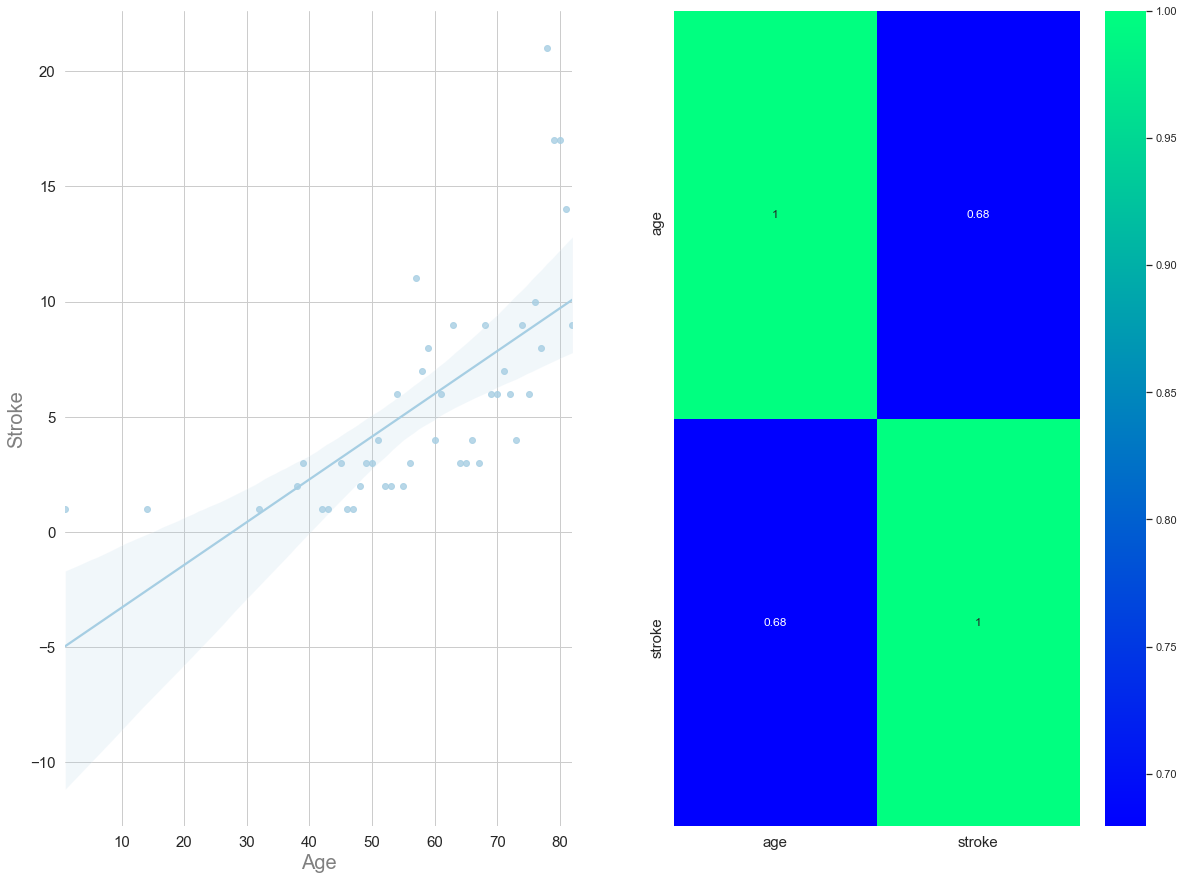

In [85]:
plt.subplot(1, 2, 1)
sns.regplot(x = 'age', y = 'stroke', data = aux3)
sns.despine(bottom = True, left = True)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Age", size = 20, color = 'grey')
plt.ylabel("Stroke", size = 20, color = 'grey')

plt.subplot(1, 2, 2)
sns.heatmap(aux3.corr( method='pearson' ), annot=True, cmap="winter")
sns.despine(bottom = True, left = True)
plt.xticks(size = 15)
plt.yticks(size = 15);

#### Hipótese 6 - Pessoas obesas têm mais chances de ter AVC que os demais

FALSA - Pessoas com sobrepeso tiveram MAIS AVC

#### Hipótese 7 - Pessoas com peso normal têm menos chances de ter AVC que os demais 

FALSA - Pessoas abaixo do peso tiveram MENOS AVC

In [86]:
aux4 = df4[df4['stroke'] == 1][['weight_status', 'stroke']].groupby('weight_status').sum().reset_index().sort_values(by = 'stroke', ascending = False)
aux4

,weight_status,stroke
2,overweight,115
1,obesity,98
0,normal_weight,35
3,underweight,1


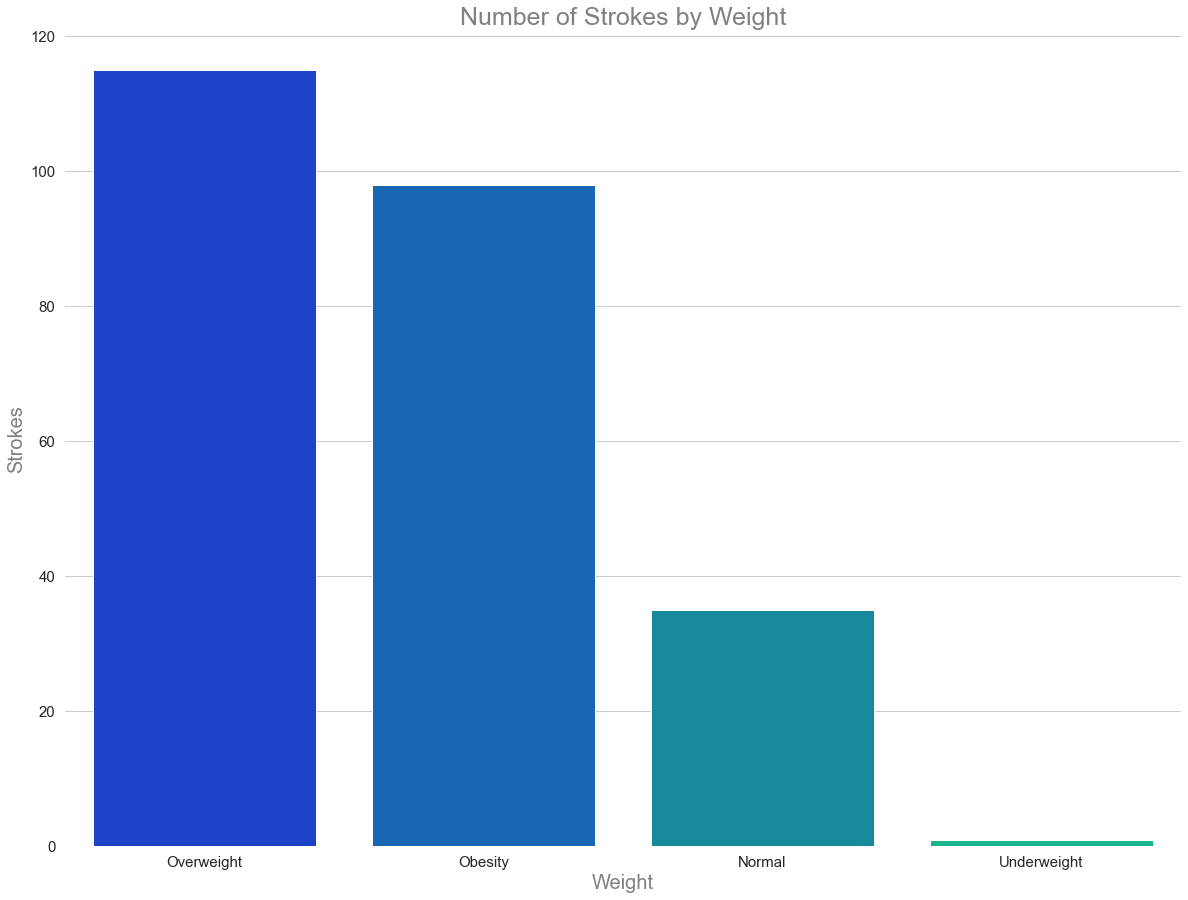

In [87]:
sns.barplot( x = 'weight_status', y = 'stroke', data = aux4, palette = 'winter' )
sns.despine( bottom = True, left = True)
plt.title( 'Number of Strokes by Weight', size = 25, color = 'gray')
plt.xlabel("Weight", size = 20, color = 'grey')
plt.ylabel("Strokes", size = 20, color = 'grey')
plt.xticks(np.arange(4), ['Overweight', 'Obesity', 'Normal', 'Underweight'], size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15);

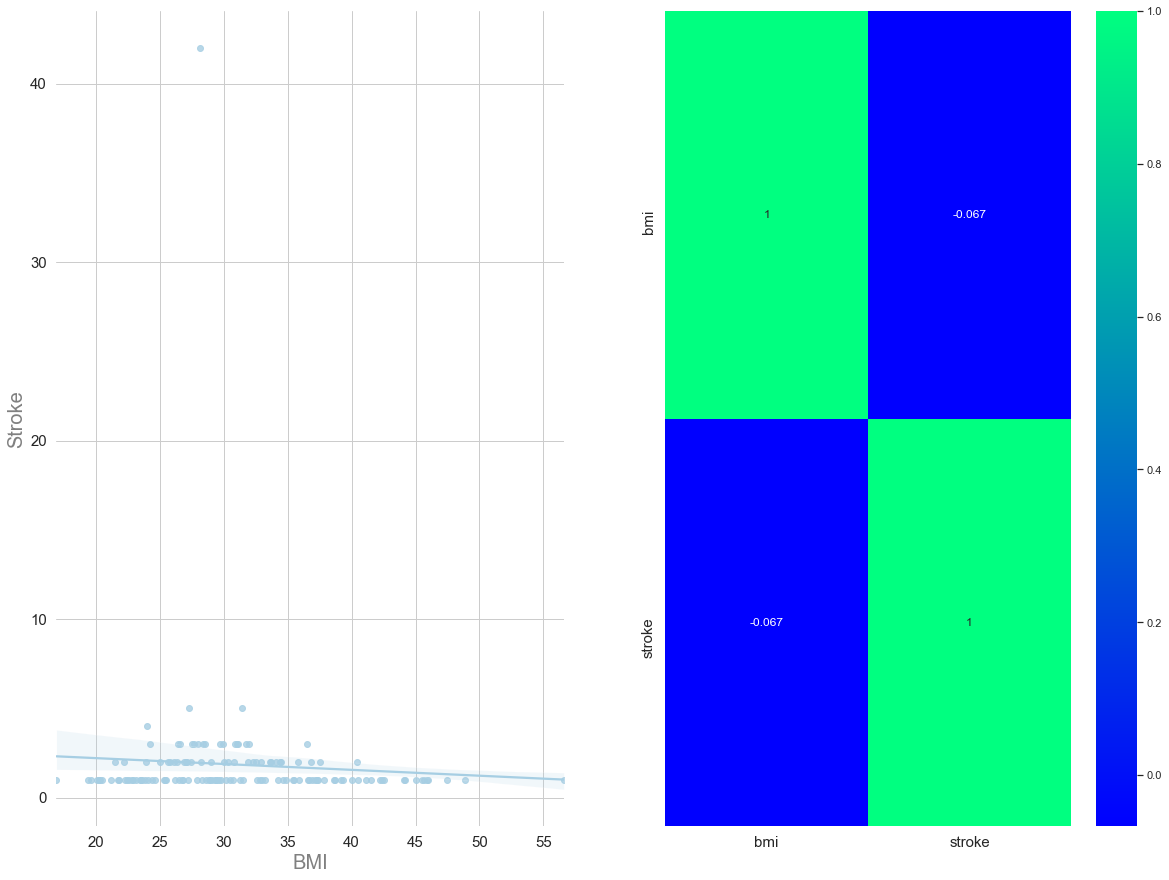

In [88]:
aux5 = df4[df4['stroke'] == 1][['bmi', 'stroke']].groupby('bmi').sum().reset_index()
plt.subplot(1, 2, 1)
sns.regplot(x = 'bmi', y = 'stroke', data = aux5)
sns.despine(bottom = True, left = True)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("BMI", size = 20, color = 'grey')
plt.ylabel("Stroke", size = 20, color = 'grey')

plt.subplot(1, 2, 2)
sns.heatmap(aux5.corr( method='pearson' ), annot=True, cmap="winter")
sns.despine(bottom = True, left = True)
plt.xticks(size = 15)
plt.yticks(size = 15);

#### Hipótese 8 - Pessoas diabéticas têm mais chances de ter AVC que os demais

VERDADEIRA - Pessoas diabéticas tiveram MAIS AVC

#### Hipótese 9 - Pessoas com nível de glicose normal têm menos chances de ter AVC que os demais 

FALSA - Pessoas com nível de glicose baixa tiveram MENOS AVC

In [89]:
aux6 = df4[df4['stroke'] == 1][['glucose_status', 'stroke']].groupby('glucose_status').sum().reset_index().sort_values(by = 'stroke', ascending = False)
aux6

,glucose_status,stroke
0,diabetes,100
2,normal,85
3,prediabetes,37
1,low,27


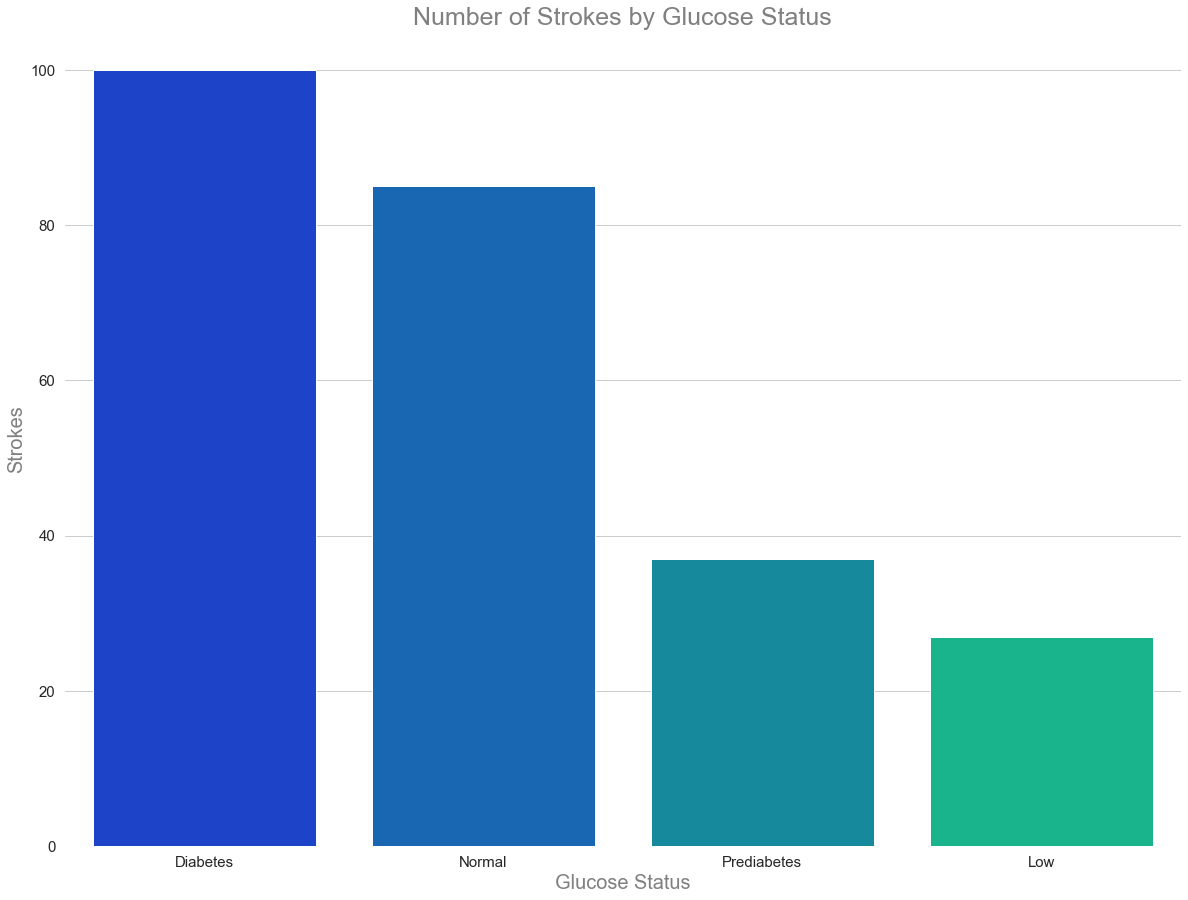

In [90]:
sns.barplot(x = 'glucose_status', y = 'stroke', data = aux6, palette = 'winter')
sns.despine(bottom = True, left = True)
plt.title('Number of Strokes by Glucose Status', size = 25, color = 'gray')
plt.xlabel("Glucose Status", size = 20, color = 'grey')
plt.ylabel("Strokes", size = 20, color = 'grey')
plt.xticks(np.arange(4), ['Diabetes', 'Normal', 'Prediabetes', 'Low'], size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15);

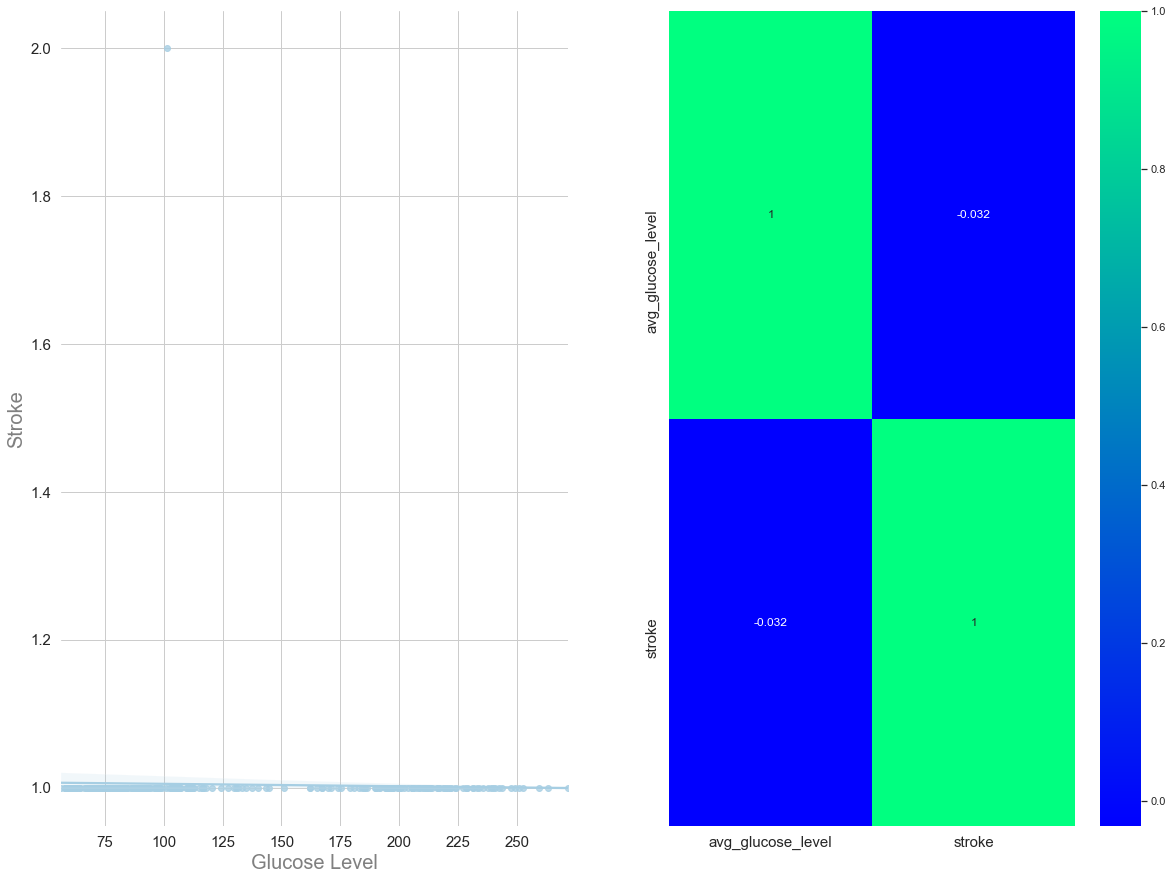

In [91]:
aux7 = df4[df4['stroke'] == 1][['avg_glucose_level', 'stroke']].groupby('avg_glucose_level').sum().reset_index()
plt.subplot(1, 2, 1)
sns.regplot(x = 'avg_glucose_level', y = 'stroke', data = aux7)
sns.despine(bottom = True, left = True)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Glucose Level", size = 20, color = 'grey')
plt.ylabel("Stroke", size = 20, color = 'grey')

plt.subplot(1, 2, 2)
sns.heatmap(aux7.corr( method='pearson' ), annot=True, cmap="winter")
sns.despine(bottom = True, left = True)
plt.xticks(size = 15)
plt.yticks(size = 15);

#### Hipótese 10 - Pessoas casadas têm mais chances de ter AVC 

VERDADEIRA - Pessoas casadas tiveram mais AVC

In [92]:
aux8 = df4[df4['stroke'] == 1][['ever_married', 'stroke']].groupby('ever_married').sum().reset_index().sort_values(by = 'stroke', ascending = False)
aux8

,ever_married,stroke
1,Yes,220
0,No,29


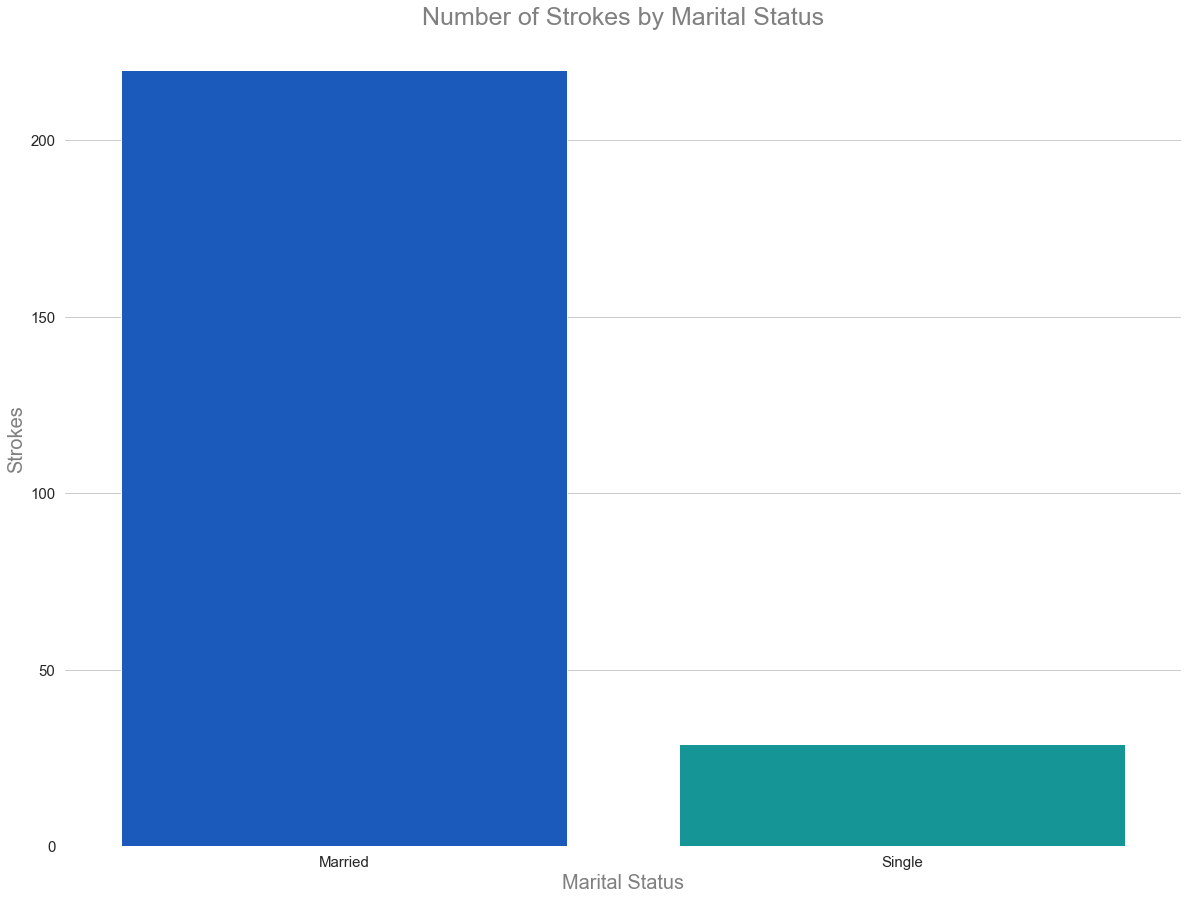

In [93]:
sns.barplot(x = 'ever_married', y = 'stroke', data = aux8, palette = 'winter')
sns.despine(bottom = True, left = True)
plt.title('Number of Strokes by Marital Status', size = 25, color = 'gray')
plt.xlabel("Marital Status", size = 20, color = 'grey')
plt.ylabel("Strokes", size = 20, color = 'grey')
plt.xticks(np.arange(2), ['Married', 'Single'], size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15);

#### Hipótese 11 - Pessoas hipertensas têm mais chances de ter AVC 

FALSA - Pessoas hipertensas tiveram MENOS AVC

In [94]:
aux9 = df4[df4['stroke'] == 1][['hypertension', 'stroke']].groupby('hypertension').sum().reset_index()
aux9

,hypertension,stroke
0,0,183
1,1,66


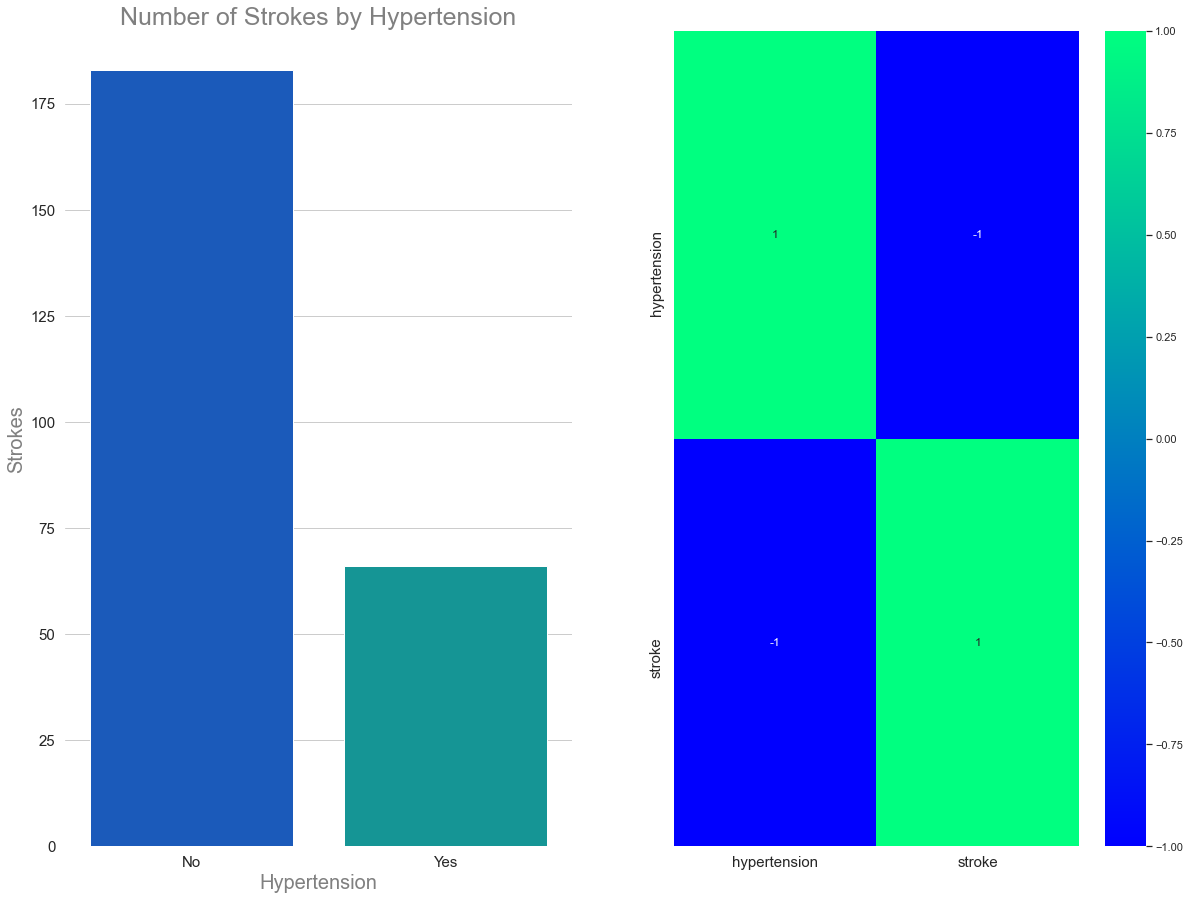

In [95]:
plt.subplot(1, 2, 1)
sns.barplot(x = 'hypertension', y = 'stroke', data = aux9, palette = 'winter')
sns.despine(bottom = True, left = True)
plt.title('Number of Strokes by Hypertension', size = 25, color = 'gray')
plt.xlabel("Hypertension", size = 20, color = 'grey')
plt.ylabel("Strokes", size = 20, color = 'grey')
plt.xticks(np.arange(2), ['No', 'Yes'], size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15);

plt.subplot(1, 2, 2)
sns.heatmap( aux9.corr( method='pearson' ), annot=True, cmap="winter" )
sns.despine( bottom = True, left = True)
plt.xticks(size = 15)
plt.yticks(size = 15);

#### Hipótese 12 - Pessoas cardíacas têm mais chances de ter AVC 

FALSA - Pessoas cardíacas tiveram MENOS AVC

In [96]:
aux10 = df4[df4['stroke'] == 1][['heart_disease', 'stroke']].groupby('heart_disease').sum().reset_index()
aux10

,heart_disease,stroke
0,0,202
1,1,47


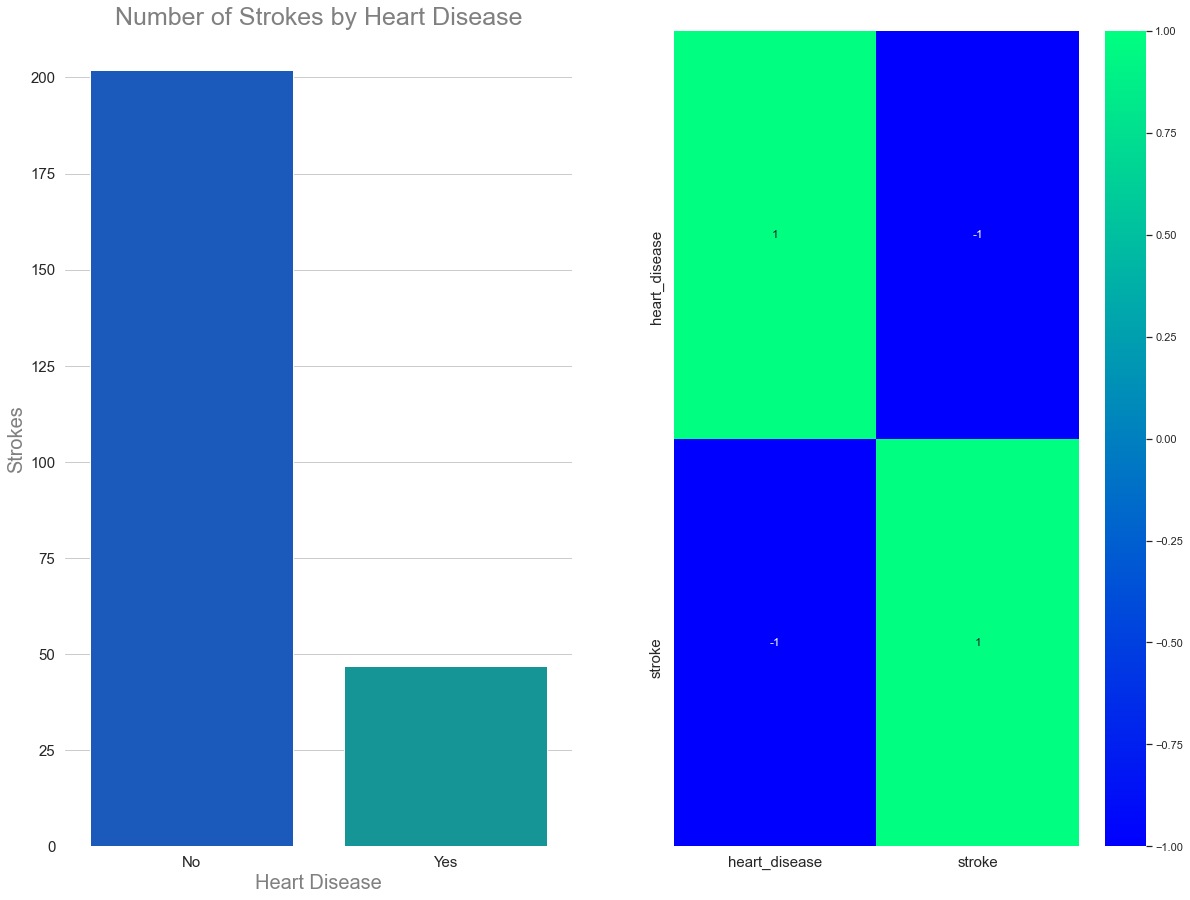

In [97]:
plt.subplot(1, 2, 1)
sns.barplot( x = 'heart_disease', y = 'stroke', data = aux10, palette = 'winter' )
sns.despine( bottom = True, left = True)
plt.title( 'Number of Strokes by Heart Disease', size = 25, color = 'gray')
plt.xlabel("Heart Disease", size = 20, color = 'grey')
plt.ylabel("Strokes", size = 20, color = 'grey')
plt.xticks(np.arange(2), ['No', 'Yes'], size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15);

plt.subplot(1, 2, 2)
sns.heatmap( aux10.corr( method='pearson' ), annot=True, cmap="winter" )
sns.despine( bottom = True, left = True)
plt.xticks(size = 15)
plt.yticks(size = 15);

#### Hipótese 13 - Pessoas que moram na zona urbana têm mais chances de ter AVC 

VERDADEIRA - Pessoas que moram na zona urba tiveram MAIS AVC

In [98]:
aux11 = df4[df4['stroke'] == 1][['Residence_type', 'stroke']].groupby('Residence_type').sum().reset_index().sort_values(by = 'stroke', ascending = False)
aux11

,Residence_type,stroke
1,Urban,135
0,Rural,114


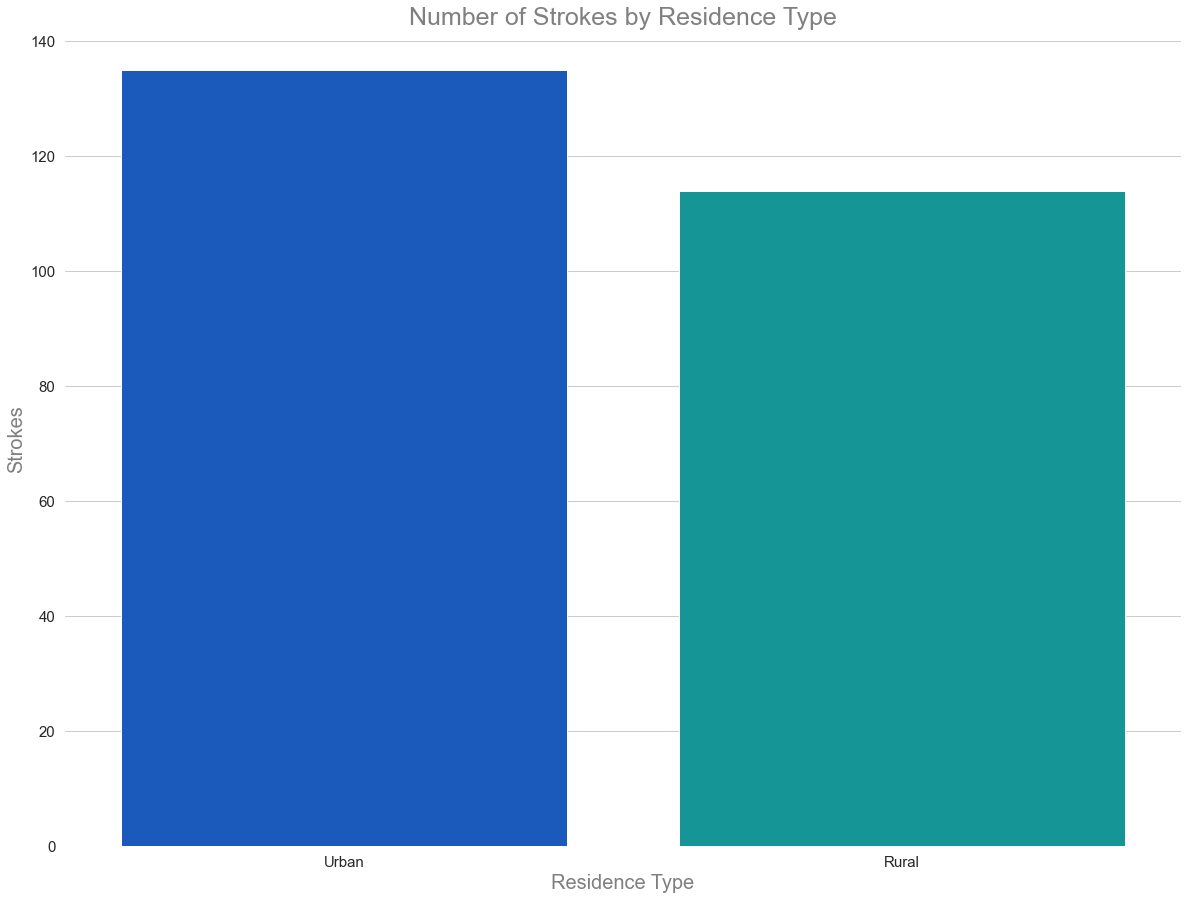

In [99]:
sns.barplot(x = 'Residence_type', y = 'stroke', data = aux11, palette = 'winter')
sns.despine(bottom = True, left = True)
plt.title('Number of Strokes by Residence Type', size = 25, color = 'gray')
plt.xlabel("Residence Type", size = 20, color = 'grey')
plt.ylabel("Strokes", size = 20, color = 'grey')
plt.xticks(np.arange(2), ['Urban', 'Rural'], size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15);

#### Hipótese 14 - Pessoas empreendedoras têm mais chances de ter AVC que os demais 

FALSA - Pessoas que trabalham no setor privado tiveram MAIS AVC

#### Hipótese 15 - Crianças têm menos chances de ter AVC que os demais 

VERDADEIRA - Pessoas desempregadas porém que são crianças tiveram MENOS AVC

In [100]:
aux12 = df4[df4['stroke'] == 1][['work_type', 'stroke']].groupby('work_type').sum().reset_index().sort_values(by = 'stroke', ascending = False)
aux12

,work_type,stroke
1,Private,149
2,Self-employed,65
0,Govt_job,33
3,children,2


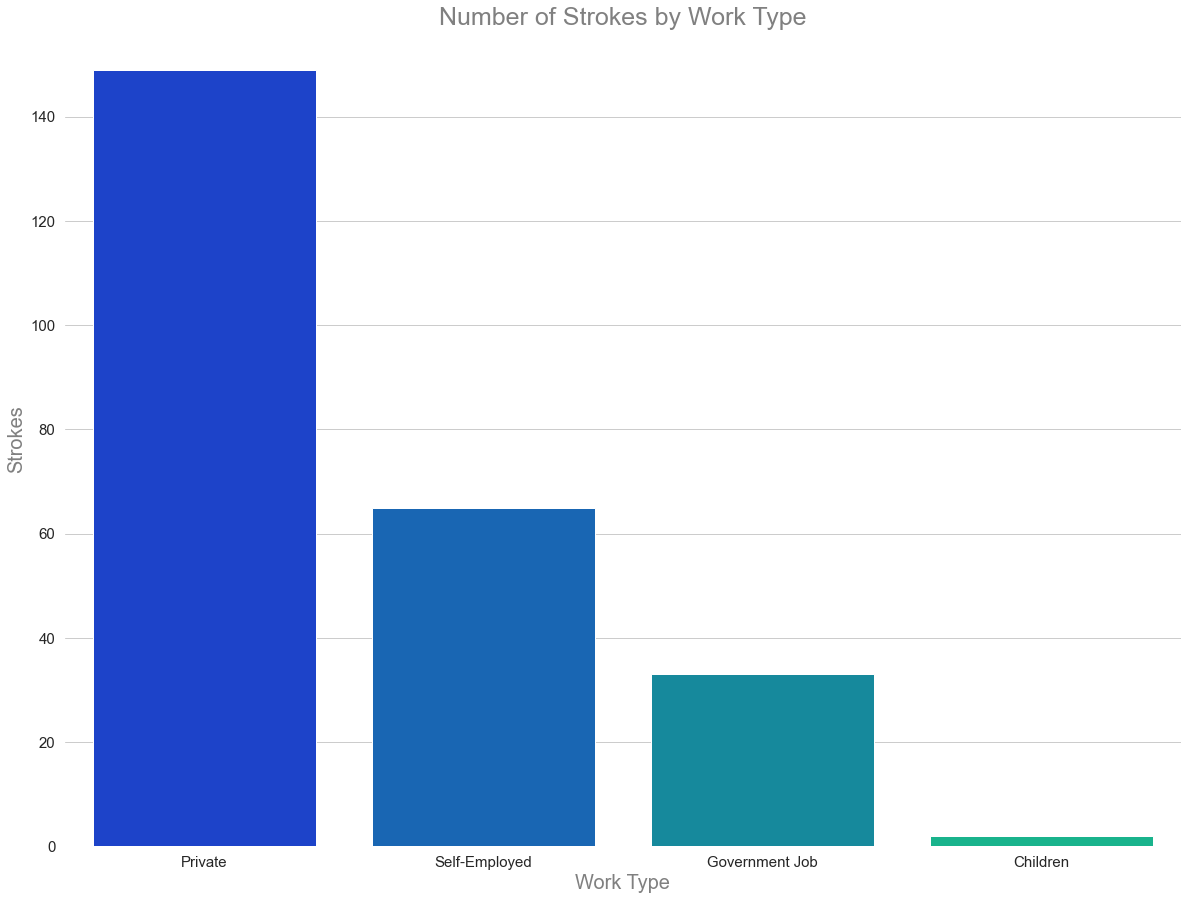

In [101]:
sns.barplot(x = 'work_type', y = 'stroke', data = aux12, palette = 'winter')
sns.despine(bottom = True, left = True)
plt.title('Number of Strokes by Work Type', size = 25, color = 'gray')
plt.xlabel("Work Type", size = 20, color = 'grey')
plt.ylabel("Strokes", size = 20, color = 'grey')
plt.xticks(np.arange(4), ['Private', 'Self-Employed', 'Government Job', 'Children'], size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15);

Hipóteses

1 - Homens têm mais chances de ter AVC que mulheres

2 - Fumantes têm mais chances de ter AVC que os demais

3 - Pessoas que nunca fumaram têm menos chances de ter AVC que os demais

4 - Crianças têm menos chances de ter AVC que os demais

5 - Idosos têm mais chances de ter AVC que os demais

6 - Pessoas obesas têm mais chances de ter AVC que os demais

7 - Pessoas com peso normal têm menos chances de ter AVC que os demais

8 - Pessoas diabéticas têm mais chances de ter AVC que os demais

9 - Pessoas com glicose normal têm menos chances de ter AVC que os demais

10 - Pessoas casadas têm mais chances de ter AVC 

11 - Pessoas hipertensas têm mais chances de ter AVC

12 - Pessoas cardíacas têm mais chances de ter AVC

13 - Pessoas que moram na zona urbana têm mais chances de ter AVC

14 - Pessoas empreendedoras têm mais chances de ter AVC que os demais

15 - Crianças têm menos chances de ter AVC que os demais




In [102]:
tab =[['Hipóteses', 'Conclusão', 'Relevância'],
      ['H1', 'Falsa', 'Alta'],  
      ['H2', 'Falsa', 'Alta'],  
      ['H3', 'Falsa', 'Alta'],
      ['H4', 'Verdadeira', 'Baixa'],
      ['H5', 'Verdadeira', 'Baixa'],
      ['H6', 'Falsa', 'Alta'],
      ['H7', 'Falsa', 'Alta'],
      ['H8', 'Verdadeira', 'Alta'],
      ['H9', 'Falsa', 'Alta'],
      ['H10', 'Verdadeira', 'Alta'],
      ['H11', 'Falsa', 'Alta'],
      ['H12', 'Falsa', 'Alta'],
      ['H13', 'Verdadeira', 'Alta'],
      ['H14', 'Falsa', 'Baixa'],
      ['H15', 'Verdadeira', 'Alta'],
     ]  
print( tabulate( tab, headers='firstrow' ) )

Hipóteses    Conclusão    Relevância
-----------  -----------  ------------
H1           Falsa        Alta
H2           Falsa        Alta
H3           Falsa        Alta
H4           Verdadeira   Baixa
H5           Verdadeira   Baixa
H6           Falsa        Alta
H7           Falsa        Alta
H8           Verdadeira   Alta
H9           Falsa        Alta
H10          Verdadeira   Alta
H11          Falsa        Alta
H12          Falsa        Alta
H13          Verdadeira   Alta
H14          Falsa        Baixa
H15          Verdadeira   Alta


### 4.3. Multivariate analysis

#### 4.3.1 Numerical Attributes

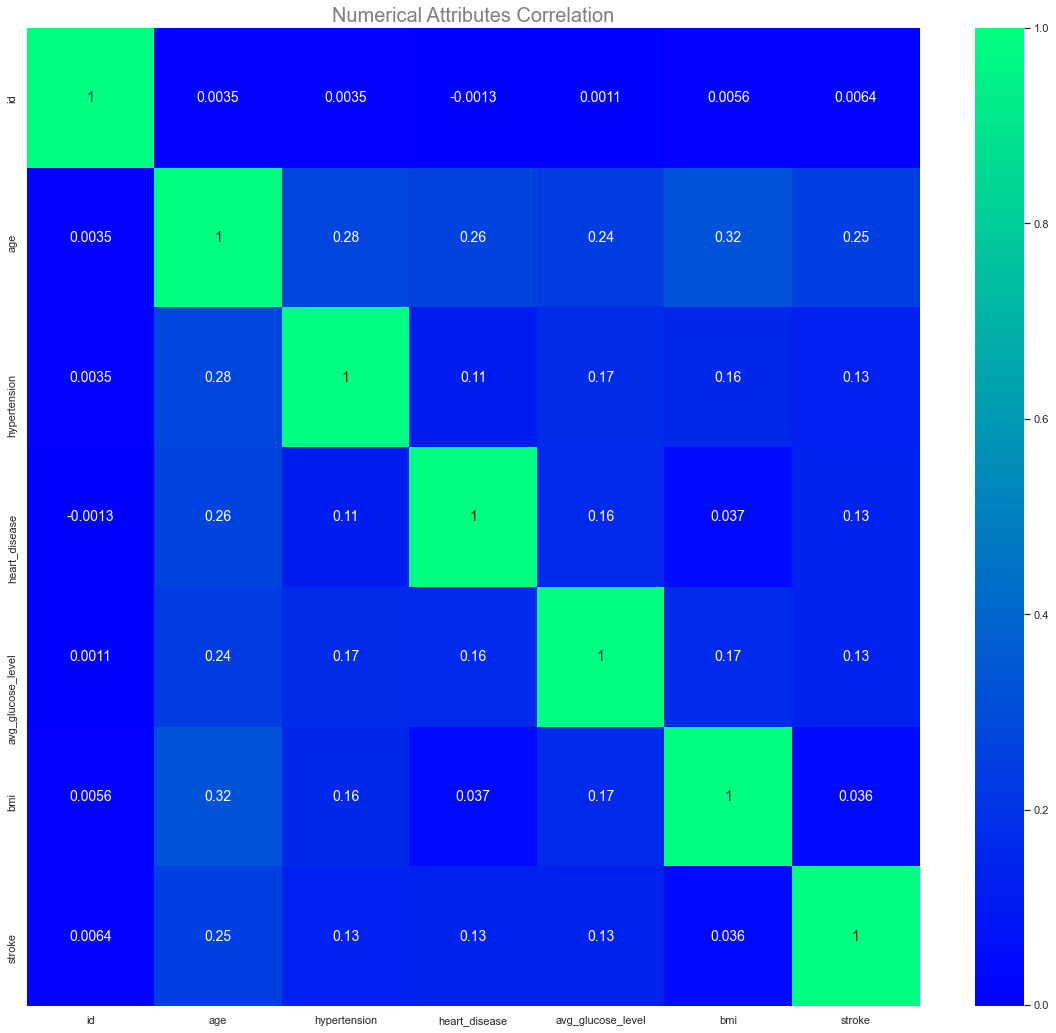

In [103]:
correlation = num_attr.corr(method='pearson')
plt.figure(figsize(20,18))
sns.heatmap(correlation, annot=True, annot_kws={"fontsize":14}, cmap='winter')
plt.title("Numerical Attributes Correlation", size=20, color='gray');

#### 4.3.2 Categorical Attributes

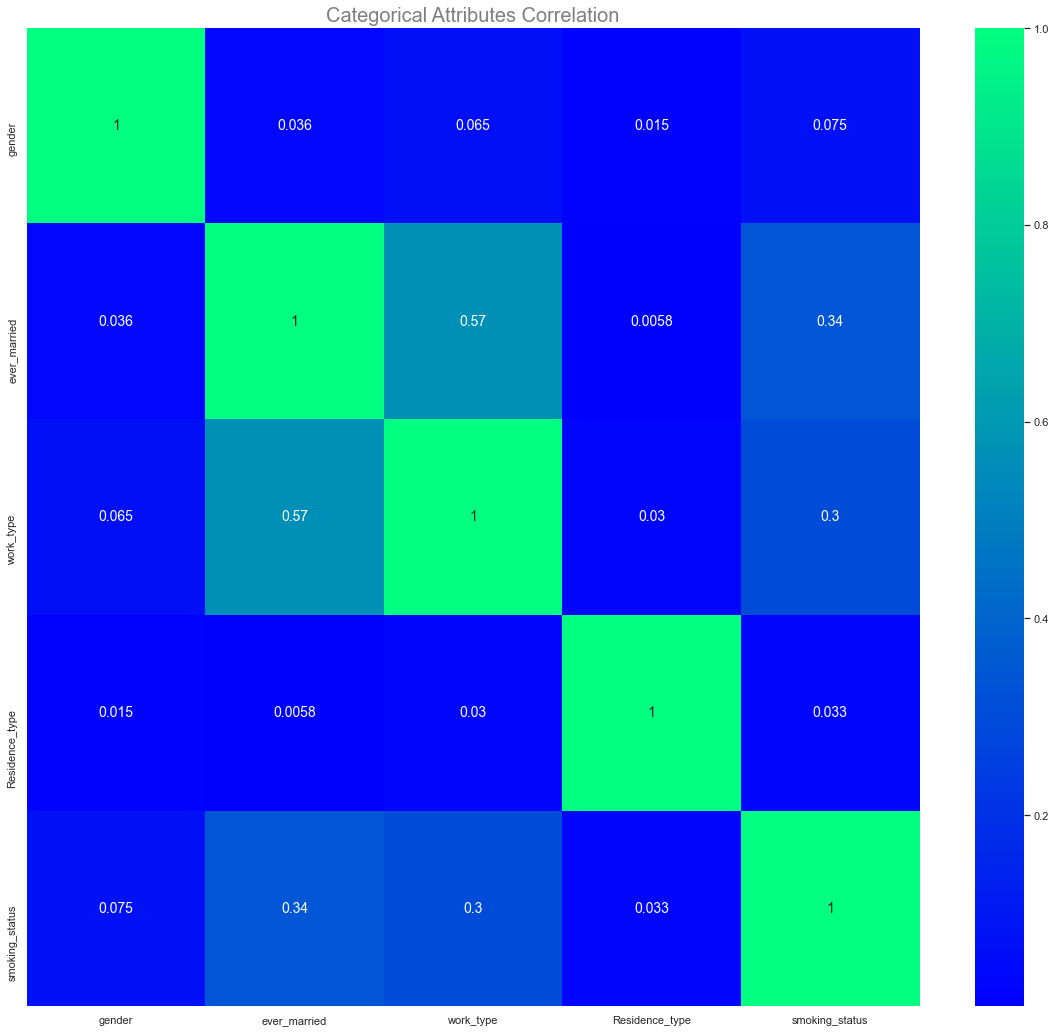

In [105]:
# Calculate cramer V
a1 = gu.cramer_v(cat_attr['gender'], cat_attr['gender'])
a2 = gu.cramer_v(cat_attr['gender'], cat_attr['ever_married'])
a3 = gu.cramer_v(cat_attr['gender'], cat_attr['work_type'])
a4 = gu.cramer_v(cat_attr['gender'], cat_attr['Residence_type'])
a5 = gu.cramer_v(cat_attr['gender'], cat_attr['smoking_status'])

a6 = gu.cramer_v(cat_attr['ever_married'], cat_attr['gender'])
a7 = gu.cramer_v(cat_attr['ever_married'], cat_attr['ever_married'])
a8 = gu.cramer_v(cat_attr['ever_married'], cat_attr['work_type'])
a9 = gu.cramer_v(cat_attr['ever_married'], cat_attr['Residence_type'])
a10 = gu.cramer_v(cat_attr['ever_married'], cat_attr['smoking_status'])

a11 = gu.cramer_v(cat_attr['work_type'], cat_attr['gender'])
a12 = gu.cramer_v(cat_attr['work_type'], cat_attr['ever_married'])
a13 = gu.cramer_v(cat_attr['work_type'], cat_attr['work_type'])
a14 = gu.cramer_v(cat_attr['work_type'], cat_attr['Residence_type'])
a15 = gu.cramer_v(cat_attr['work_type'], cat_attr['smoking_status'])

a16 = gu.cramer_v(cat_attr['Residence_type'], cat_attr['gender'])
a17 = gu.cramer_v(cat_attr['Residence_type'], cat_attr['ever_married'])
a18 = gu.cramer_v(cat_attr['Residence_type'], cat_attr['work_type'])
a19 = gu.cramer_v(cat_attr['Residence_type'], cat_attr['Residence_type'])
a20 = gu.cramer_v(cat_attr['Residence_type'], cat_attr['smoking_status'])

a21 = gu.cramer_v(cat_attr['smoking_status'], cat_attr['gender'])
a22 = gu.cramer_v(cat_attr['smoking_status'], cat_attr['ever_married'])
a23 = gu.cramer_v(cat_attr['smoking_status'], cat_attr['work_type'])
a24 = gu.cramer_v(cat_attr['smoking_status'], cat_attr['Residence_type'])
a25 = gu.cramer_v(cat_attr['smoking_status'], cat_attr['smoking_status'])


# Final dataset
df_cramer_v = pd.DataFrame({'gender': [a1, a2, a3, a4, a5], 
                  'ever_married': [a6, a7, a8, a9, a10],
                  'work_type': [a11, a12, a13, a14, a15],
                  'Residence_type': [a16, a17, a18, a19, a20],
                  'smoking_status': [a21, a22, a23, a24, a25]})
df_cramer_v = df_cramer_v.set_index( df_cramer_v.columns )

plt.figure(figsize(20,18))
sns.heatmap(df_cramer_v, annot=True, annot_kws={"fontsize":14}, cmap='winter')
plt.title("Categorical Attributes Correlation", size=20, color='gray');

In [109]:
# # Calculate Theils U
# a1 = gu.theils_u(cat_attr['gender'], cat_attr['gender'])
# a2 = gu.theils_u(cat_attr['gender'], cat_attr['ever_married'])
# a3 = gu.theils_u(cat_attr['gender'], cat_attr['work_type'])
# a4 = gu.theils_u(cat_attr['gender'], cat_attr['Residence_type'])
# a5 = gu.theils_u(cat_attr['gender'], cat_attr['smoking_status'])

# a6 = gu.theils_u(cat_attr['ever_married'], cat_attr['gender'])
# a7 = gu.theils_u(cat_attr['ever_married'], cat_attr['ever_married'])
# a8 = gu.theils_u(cat_attr['ever_married'], cat_attr['work_type'])
# a9 = gu.theils_u(cat_attr['ever_married'], cat_attr['Residence_type'])
# a10 = gu.theils_u(cat_attr['ever_married'], cat_attr['smoking_status'])

# a11 = gu.theils_u(cat_attr['work_type'], cat_attr['gender'])
# a12 = gu.theils_u(cat_attr['work_type'], cat_attr['ever_married'])
# a13 = gu.theils_u(cat_attr['work_type'], cat_attr['work_type'])
# a14 = gu.theils_u(cat_attr['work_type'], cat_attr['Residence_type'])
# a15 = gu.theils_u(cat_attr['work_type'], cat_attr['smoking_status'])

# a16 = gu.theils_u(cat_attr['Residence_type'], cat_attr['gender'])
# a17 = gu.theils_u(cat_attr['Residence_type'], cat_attr['ever_married'])
# a18 = gu.theils_u(cat_attr['Residence_type'], cat_attr['work_type'])
# a19 = gu.theils_u(cat_attr['Residence_type'], cat_attr['Residence_type'])
# a20 = gu.theils_u(cat_attr['Residence_type'], cat_attr['smoking_status'])

# a21 = gu.theils_u(cat_attr['smoking_status'], cat_attr['gender'])
# a22 = gu.theils_u(cat_attr['smoking_status'], cat_attr['ever_married'])
# a23 = gu.theils_u(cat_attr['smoking_status'], cat_attr['work_type'])
# a24 = gu.theils_u(cat_attr['smoking_status'], cat_attr['Residence_type'])
# a25 = gu.theils_u(cat_attr['smoking_status'], cat_attr['smoking_status'])


# # Final dataset
# df_theils_u = pd.DataFrame({'gender': [a1, a2, a3, a4, a5], 
#                   'ever_married': [a6, a7, a8, a9, a10],
#                   'work_type': [a11, a12, a13, a14, a15],
#                   'Residence_type': [a16, a17, a18, a19, a20],
#                   'smoking_status': [a21, a22, a23, a24, a25]})
# df_theils_u = df_theils_u.set_index( df_theils_u.columns )

# plt.figure(figsize(20,18))
# sns.heatmap(df_theils_u, annot=True, annot_kws={"fontsize":14}, cmap='winter')
# plt.title("Categorical Attributes Correlation", size=20, color='gray');

AssertionError: 

## 5.0. DATA PREPARATION

In [ ]:
df5 = df4.copy()

In [ ]:
df5.drop(['id'], axis=1, inplace=True)

In [ ]:
df5['gender'].value_counts()

In [ ]:
# Como só se tem 1 'Other' em 'gender' provavelmente se trata de um erro, então será retirado
df5.drop(df5[df5['gender'] == 'Other'].index, axis = 0, inplace = True)

### 5.1. Scaling Numerical Variables

In [ ]:
plt.subplot(1, 3, 1)
sns.boxplot(df5['age']);

plt.subplot(1, 3, 2)
sns.boxplot(df5['avg_glucose_level']);

plt.subplot(1, 3, 3)
sns.boxplot(df5['bmi']);

In [ ]:
# Aplicarei Min-Max Scaler em 'age' que não possui outliers 
# e Robust Scaler em 'avg_glucose_level' e 'bmi' pois possuem bastante outliers
mms = MinMaxScaler()
rs = RobustScaler()

df5['age'] = rs.fit_transform(df5[['age']].values)

df5['avg_glucose_level'] = mms.fit_transform(df5[['avg_glucose_level']].values)

df5['bmi'] = mms.fit_transform(df5[['bmi']].values)

### 5.2. Encoding Categorical Variables

In [ ]:
# Para 'gender', 'ever_married' e 'Residence_type' como só possuem 2 opcões de variáveis serão transformados por Label Encoder
le = LabelEncoder()

df5['gender'] = le.fit_transform(df5['gender'])

df5['ever_married'] = le.fit_transform(df5['ever_married'])

df5['Residence_type'] = le.fit_transform(df5['Residence_type'])

In [ ]:
# 'work_type', 'smoking_status', 'weight_status', 'glucose_status' e 'age_group' possuem múltiplas variáveis então
# será aplicado frequency encoding

fe_wt = df5['work_type'].value_counts()/len(df5)
fe_wt.to_dict()
df5['work_type'] = df5['work_type'].map(fe_wt)

fe_ss = df5['smoking_status'].value_counts()/len(df5)
fe_ss.to_dict()
df5['smoking_status'] = df5['smoking_status'].map(fe_ss)

fe_ws = df5['weight_status'].value_counts()/len(df5)
fe_ws.to_dict()
df5['weight_status'] = df5['weight_status'].map(fe_ws)

fe_gs = df5['glucose_status'].value_counts()/len(df5)
fe_gs.to_dict()
df5['glucose_status'] = df5['glucose_status'].map(fe_gs)

fe_ag = df5['age_group'].value_counts()/len(df5)
fe_ag.to_dict()
df5['age_group'] = df5['age_group'].map(fe_ag)

## 6.0. FEATURE SELECTION

In [ ]:
df6 = df5.copy()

### 6.1. Split into Train and Test datasets

In [ ]:
x = df6.copy()
x.drop(['stroke'], axis=1, inplace=True)

In [ ]:
y = df6['stroke'].copy()

In [ ]:
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
# Boruta selecionou apenas 2 variaveis, não será utilizado
# # define RandomForestRegressor
# rf_clf = RandomForestClassifier(n_jobs=-1)

# # define Boruta
# boruta = BorutaPy(rf_clf, n_estimators='auto', verbose=2, random_state=42).fit(x_train.values, y_train.values.ravel())

In [ ]:
# cols_selected = boruta.support_.tolist()
# cols_selected_boruta = x_train.iloc[:, cols_selected].columns.to_list()
# cols_selected_boruta

In [ ]:
# x_train_boruta = x_train[cols_selected_boruta].copy()
# x_test_boruta = x_test[cols_selected_boruta].copy()

## 7.0. MACHINE LEARNING MODELING

In [ ]:
df7 = df6.copy()

### 7.1. Balancing data for training

In [ ]:
y_train.value_counts()

In [ ]:
 # defines the resampler
resampler = SMOTETomek(random_state = 42, n_jobs=-1)

# makes the balancing
x_train, y_train = resampler.fit_resample(x_train, y_train)

In [ ]:
y_train.value_counts()

In [ ]:
model1 = LogisticRegression(max_iter=220, random_state=42)
model2 = RandomForestClassifier(random_state=42)
model3 = xgb.XGBClassifier(random_state=42)
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

In [ ]:
log_reg_predict = model1.predict(x_test)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_test, log_reg_predict)))

In [ ]:
cv = StratifiedKFold(n_splits=10)

 # calculates the cross validation scores
cv_scores = cross_val_score(model1, x_train, y_train, cv = cv, scoring='precision', n_jobs=-1)

# prints the average precision and standard deviation of the scores
print("Average precision: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(model1, x_train, y_train, cv = cv, scoring='recall', n_jobs=-1)

# prints the average recall and standard deviation of the scores
print("\nAverage recall: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(model1, x_train, y_train, cv = cv, scoring='f1', n_jobs=-1)

# prints the average f1-score and standard deviation of the scores
print("\nAverage f1-score: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(model1, x_train, y_train, cv = cv, scoring='roc_auc', n_jobs=-1)

In [ ]:
rf_class_predict = model2.predict(x_test)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_test, rf_class_predict)))

In [ ]:
cv = StratifiedKFold(n_splits=10)

 # calculates the cross validation scores
cv_scores = cross_val_score(model2, x_train, y_train, cv = cv, scoring='precision', n_jobs=-1)

# prints the average precision and standard deviation of the scores
print("Average precision: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(model2, x_train, y_train, cv = cv, scoring='recall', n_jobs=-1)

# prints the average recall and standard deviation of the scores
print("\nAverage recall: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(model2, x_train, y_train, cv = cv, scoring='f1', n_jobs=-1)

# prints the average f1-score and standard deviation of the scores
print("\nAverage f1-score: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(model2, x_train, y_train, cv = cv, scoring='roc_auc', n_jobs=-1)

In [ ]:
xgb_class_predict = model3.predict(x_test)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_test, xgb_class_predict)))

In [ ]:
cv = StratifiedKFold(n_splits=10)

 # calculates the cross validation scores
cv_scores = cross_val_score(model3, x_train, y_train, cv = cv, scoring='precision', n_jobs=-1)

# prints the average precision and standard deviation of the scores
print("Average precision: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(model3, x_train, y_train, cv = cv, scoring='recall', n_jobs=-1)

# prints the average recall and standard deviation of the scores
print("\nAverage recall: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(model3, x_train, y_train, cv = cv, scoring='f1', n_jobs=-1)

# prints the average f1-score and standard deviation of the scores
print("\nAverage f1-score: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(model3, x_train, y_train, cv = cv, scoring='roc_auc', n_jobs=-1)

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, log_reg_predict, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, log_reg_predict, labels = [1, 0]))

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, rf_class_predict, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_class_predict, labels = [1, 0]))

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, xgb_class_predict, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, xgb_class_predict, labels = [1, 0]))